<a href="https://colab.research.google.com/github/albalopezdevesa/MINERIA_DATOS/blob/main/Lab02__GrupoA04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 02 Ordinaria

Grupo A04

Lucía Casas, Marta Herraiz, Alba López, Paula Redondo

## Práctica 1 (Reglas de asociación)

Primero cargaremos el dataset y llamaremos a las librerías para realizar el algoritmo Apriori:

In [ ]:
# Importamos librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
uploaded = files.upload()

data = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation (1).csv


Ahora veremos los datos que tenemos y cómo son:

In [ ]:
data.shape
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comprobamos que los datos que hay no están en un formato muy legible, ya que para realizar el ejercicio, nos interesa tener una lista de sublistas

Vamos a ver con qué frecuencia aparecen los elementos, para saber cuáles son los que más se compran y los que menos. Se entiende que los que más se compran aparecerán en la mayoría de reglas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


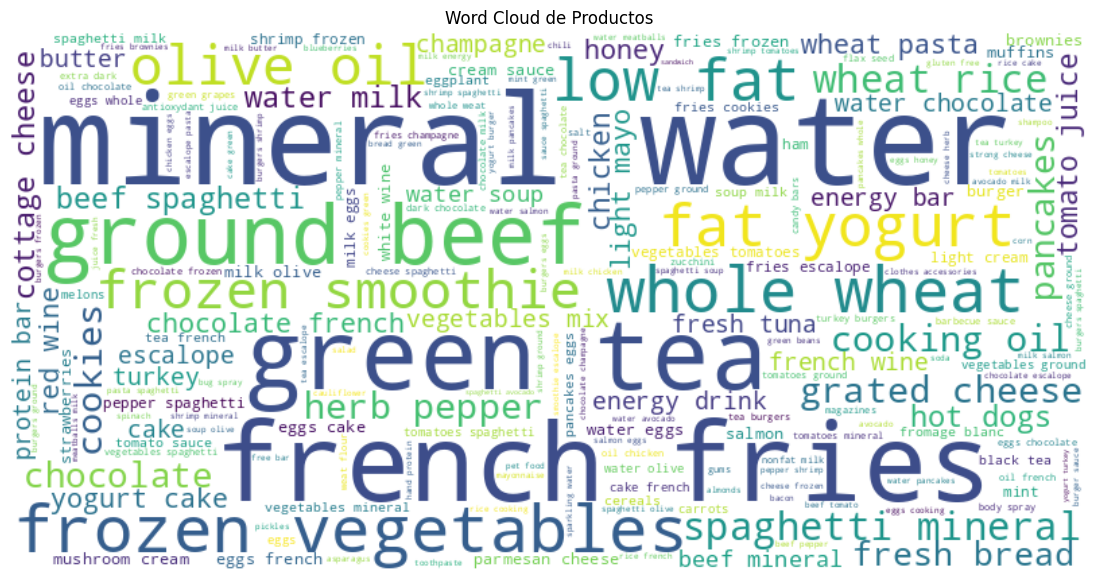

In [ ]:
# Crear una lista de todos los productos
all_products = data.values.flatten()
all_products = [str(product) for product in all_products if str(product) != 'nan']

# Concatenar todos los productos en una cadena separada por espacios
text = ' '.join(all_products)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(18, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud de Productos')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


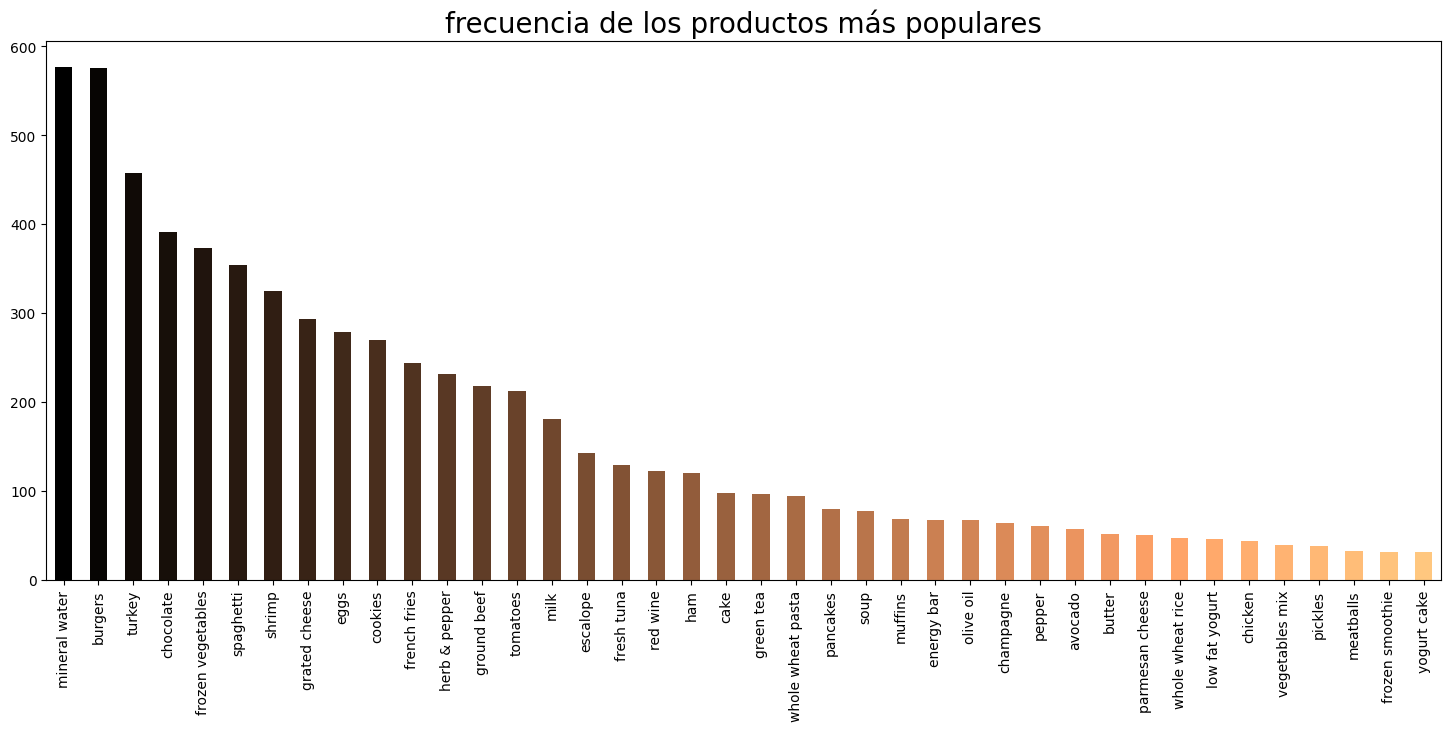

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frecuencia de los productos más populares', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

# Transformación de los datos:

Para implementar el algoritmo Apriori, los datos deben estar en un formato binario con filas que representen transacciones y columnas que representen elementos. Con este propósito, hemos utilizado el codificador de transacciones para convertir los datos al formato requerido.

Vamos a utilizar TransactionEncoder, ya que pondrá los datos en el formado adecuado para aplicar luego apriori. Esto consiste en contar una única vez cada elemento por transacción, ingnorando si en una misma transacción se han comprado dos o más elementos iguales. Esto se consigue usando valores booleanos, ' se ha comprado = true ' no se ha comprado = false ', al ser true no se tiene en cuenta si se han comprado dos o más.

En conclusión, vamos a convertir a un formato adecuado para aplicar apriori con las librerías de python. Necesitamos que sea una lista de listas, donde cada sublista es una transacción de cada cliente.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Hay una variable, 'asparagus' que está repetida pero con un espacio. Es decir, tenemos 'asparagus' y ' asparagus', vamos a quitar la que contiene solo un elemento y la vamos a añadir a la otra.



In [ ]:
fila_con_true = data[data[' asparagus'] == True].index[0]
print(fila_con_true)

694


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Iterar sobre cada fila del DataFrame
for index, fila in data.iterrows():
    # Verificar si hay un 'True' en la columna correspondiente al elemento ' asparagus'
    if fila[' asparagus']:
        # Cambiar el valor a 'True' en la columna correspondiente al elemento 'asparagus'
        data.at[index, 'asparagus'] = True
        # Establecer el valor en la columna correspondiente al elemento ' asparagus' como 'False'
        data.at[index, ' asparagus'] = False
        print(data.index)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=7501, step=1)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Comprobamos que hemos eliminado el valor

In [ ]:
# Verificar el valor en la fila 694 de la columna ' asparagus'
valor_asparagus = data.loc[694, ' asparagus']

# Imprimir el resultado
print("El valor en la fila 694 de la columna ' asparagus' es:", valor_asparagus)

El valor en la fila 694 de la columna ' asparagus' es: False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ahora vamos a eliminar la columna de ' asparagus' ya que no tiene valores True

In [ ]:
data = data.drop(columns=[' asparagus'])
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


También hay una columna llamada 'nan' que tiene como valores 'nan'. Esta genera problemas a la hora de crear las reglas, por lo que también vamos a eliminarla

In [ ]:
print(data['nan'])
data.drop(columns=['nan'], inplace=True)

0       False
1        True
2        True
3        True
4        True
        ...  
7496     True
7497     True
7498     True
7499     True
7500     True
Name: nan, Length: 7501, dtype: bool


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Aplicamos el algoritmo Apriori para 3 configuraciones distintas

Calculamos para soporte mínimo = 0.01 usando como métrica la confianza:

Mostraremos las reglas filtrándolas por el lift ya que nos conviene hacer que este sea superior a uno. En caso contrario, serían independientes y la regla no diría nada o estarían negativamente correladas y resultarían en una mala regla.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets1 = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.4)

rules_filtradas1 = rules1[rules1['lift'] > 1]
print(rules_filtradas1)
reglas_eliminadas1 = len(rules1) - len(rules_filtradas1)

print(' se han eliminado: ', reglas_eliminadas1, 'reglas')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                       antecedents      consequents  antecedent support  \
0                    (ground beef)  (mineral water)            0.098254   
1                      (olive oil)  (mineral water)            0.065858   
2                         (salmon)  (mineral water)            0.042528   
3                           (soup)  (mineral water)            0.050527   
4                (eggs, chocolate)  (mineral water)            0.033196   
5         (ground beef, chocolate)  (mineral water)            0.023064   
6                (chocolate, milk)  (mineral water)            0.032129   
7           (chocolate, spaghetti)  (mineral water)            0.039195   
8              (ground beef, eggs)  (mineral water)            0.019997   
9                     (eggs, milk)  (mineral water)            0.030796   
10       (frozen vegetables, milk)  (mineral water)            0.023597   
11  (frozen vegetables, spaghetti)  (mineral water)            0.027863   
12             (ground be

Ahora en vez de con soporte lo haremos usando frecuencia:

In [ ]:
# Calcular la frecuencia mínima deseada
min_frequency = 100

# Calcular el número total de transacciones
total_transactions = len(data)

# Convertir la frecuencia mínima en soporte
min_support = min_frequency / total_transactions

frequent_itemsets11 = apriori(data, min_support=min_support, use_colnames=True)
frequent_itemsets11['length'] = frequent_itemsets11['itemsets'].apply(lambda x: len(x))
frequent_itemsets11

rules11 = association_rules(frequent_itemsets11, metric="confidence", min_threshold=0.4)

rules_filtradas11 = rules11[rules11['lift'] > 1]
print(rules_filtradas11)
reglas_eliminadas11 = len(rules11) - len(rules_filtradas11)
print(' se han eliminado: ', reglas_eliminadas11, 'reglas')


                    antecedents      consequents  antecedent support  \
0                 (ground beef)  (mineral water)            0.098254   
1                   (olive oil)  (mineral water)            0.065858   
2                      (salmon)  (mineral water)            0.042528   
3                        (soup)  (mineral water)            0.050527   
4             (eggs, chocolate)  (mineral water)            0.033196   
5             (chocolate, milk)  (mineral water)            0.032129   
6        (chocolate, spaghetti)  (mineral water)            0.039195   
7  (ground beef, mineral water)      (spaghetti)            0.040928   
8      (ground beef, spaghetti)  (mineral water)            0.039195   
9             (spaghetti, milk)  (mineral water)            0.035462   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401   
1            0.238368  0.027596    0.419028  1.75

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Concluimos en que salen más reglas usando el soporte en vez de la frecuencia. Esto puede ser beneficioso, pero a la vez puede crear reglas no válidas o de poco interés práctico al no revelar nada novedoso. Con más reglas habrá más diversidad. Consideraremos mejor soporte ya que dará una visión más amplia.

Se puede comprobar que casi todas las reglas que salen tienen como consecuente 'mineral water' lo cual es una regla poco novedosa. Casi todos compran mineral water por lo que es difícil concluir en que esto es una buena regla.  

Vamos a basarnos en unos gráficos de dispersión para ver las diferencias entre el uso del soporte y la frecuencia en la generación de las reglas de asociación.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


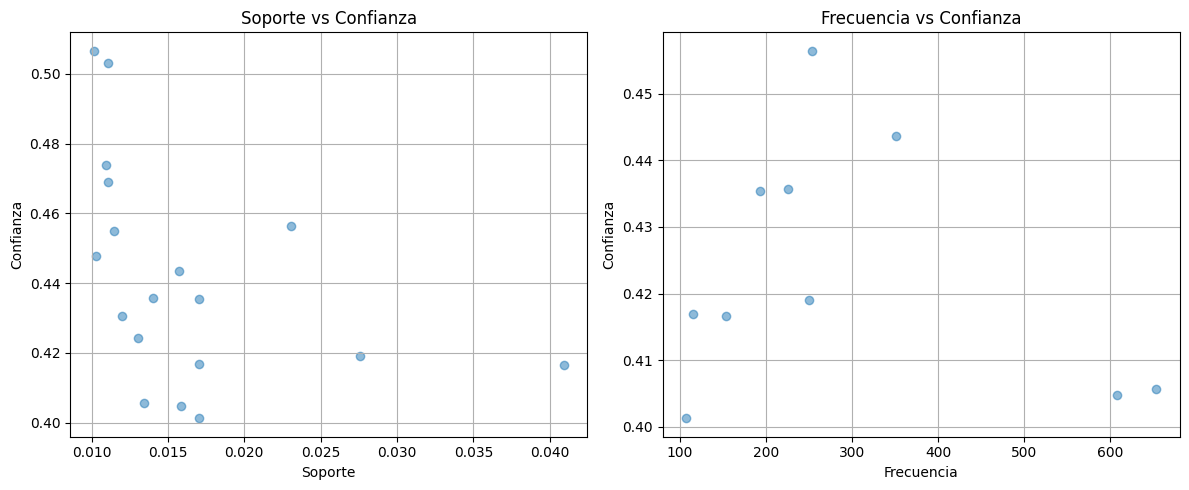

In [ ]:
# Calcular la frecuencia de los itemsets frecuentes
frequent_itemsets11['frequency'] = frequent_itemsets11['support'] * total_transactions

# Fusionar los datos relevantes en un solo DataFrame
merged_data = pd.concat([frequent_itemsets11, rules_filtradas11], axis=1)
# Crear una figura con dos subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Soporte vs Confianza
plt.subplot(1, 2, 1)
plt.scatter(rules_filtradas1['support'], rules_filtradas1['confidence'], alpha=0.5)
plt.title('Soporte vs Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.grid(True)

# Subplot 2: Frecuencia vs Confianza
plt.subplot(1, 2, 2)
plt.scatter(merged_data['frequency'], merged_data['confidence'], alpha=0.5)
plt.title('Frecuencia vs Confianza')
plt.xlabel('Frecuencia')
plt.ylabel('Confianza')
plt.grid(True)

# Ajustar y mostrar la figura
plt.tight_layout()
plt.show()



Al analizar los gráficos de dispersión para el soporte contra la confianza y la frecuencia contra la confianza, se pueden identificar claramente las diferencias entre utilizar el soporte y la frecuencia en la generación de reglas de asociación.

1. Cantidad de reglas:

Utilizando el soporte como métrica de relevancia, podemos observar una mayor cantidad de reglas en comparación con el uso de la frecuencia. Esto se evidencia al observar que el gráfico de dispersión para el soporte y la confianza muestra una distribución más densa de puntos en general, en comparación con el gráfico para la frecuencia y la confianza.

2. Confianza alcanzada:

Se destaca que, en general, las reglas generadas utilizando el soporte alcanzan una confianza más alta en comparación con aquellas generadas utilizando la frecuencia. Esto se evidencia al observar que hay dos reglas por encima del 50% de confianza en el gráfico de dispersión para el soporte, mientras que con la frecuencia no hay ninguna regla que alcance siquiera el 46% de confianza.

Representamos gráficamente las reglas obtenidas con soporte y vemos dado el antecesor en cuántas reglas aparece

In [ ]:
from collections import defaultdict

# Crear un diccionario para almacenar el conteo de los antecedentes
conteo_antecedentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas1.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1

# Imprimir el conteo de cada antecedente
for antecedente, conteo in conteo_antecedentes.items():
    print(f"El antecedente '{antecedente}' aparece {conteo} veces.")


El antecedente 'ground beef' aparece 6 veces.
El antecedente 'olive oil' aparece 2 veces.
El antecedente 'salmon' aparece 1 veces.
El antecedente 'soup' aparece 1 veces.
El antecedente 'eggs' aparece 3 veces.
El antecedente 'chocolate' aparece 4 veces.
El antecedente 'milk' aparece 5 veces.
El antecedente 'spaghetti' aparece 6 veces.
El antecedente 'frozen vegetables' aparece 2 veces.
El antecedente 'mineral water' aparece 1 veces.
El antecedente 'pancakes' aparece 1 veces.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Vamos a utilizar dos pie charts, para ver con qué frecuencia aparecen los antecedentes y los consecuentes en nuestras reglas:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


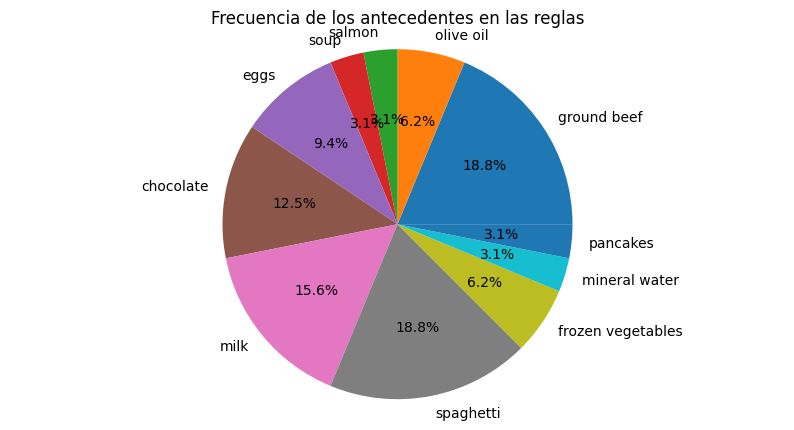

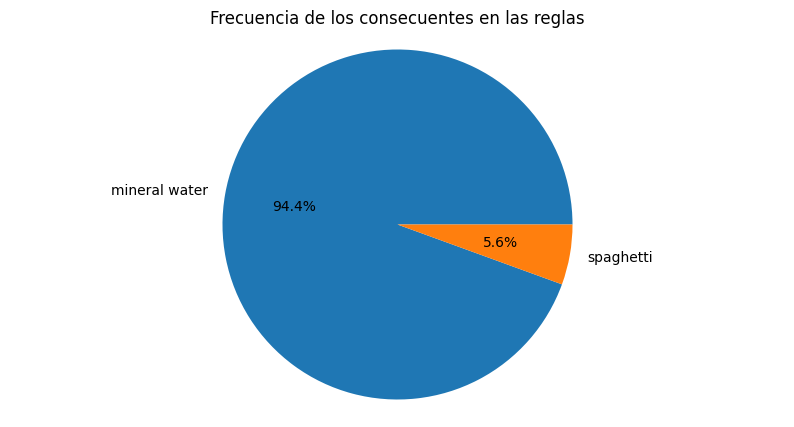

In [ ]:
import matplotlib.pyplot as plt

# Obtener conteo de antecedentes y consecuentes
conteo_antecedentes = defaultdict(int)
conteo_consecuentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas1.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1
    for consecuente in rule['consequents']:
        conteo_consecuentes[consecuente] += 1

# Crear pie chart para los antecedentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_antecedentes.values(), labels=conteo_antecedentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los antecedentes en las reglas')
plt.axis('equal')
plt.show()

# Crear pie chart para los consecuentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_consecuentes.values(), labels=conteo_consecuentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los consecuentes en las reglas')
plt.axis('equal')
plt.show()


Podemos comprobar que en el pie chart de los antecedentes domina ground beef con espaguetti, estos dos forman una de las reglas, lo cual tiene sentido. Además, vemos que milk también es un producto que compran mucho los clientes. Podemos generalizar diciendo que obviamente casi todos compran agua, pero además, podríamos afirmar que muchos la compran con 'espaguetti', 'ground beef', 'milk' o 'chocolate'

Ahora probamos con un soporte de 0.02, ya que tenemos pocos datos estamos probando con valores de soporte bajos. Con 0.02 vamos a comprobar a cuántas reglas se reduce el dataset.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets2 = apriori(data, min_support = 0.02, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2


rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.4)

rules_filtradas2 = rules2[rules2['lift'] > 1]
print(rules_filtradas2)
reglas_eliminadas2 = len(rules2) - len(rules_filtradas2)

print(' se han eliminado: ', reglas_eliminadas2, 'reglas')

     antecedents      consequents  antecedent support  consequent support  \
0  (ground beef)  (mineral water)            0.098254            0.238368   
1    (olive oil)  (mineral water)            0.065858            0.238368   
2         (soup)  (mineral water)            0.050527            0.238368   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.040928    0.416554  1.747522  0.017507    1.305401       0.474369  
1  0.027596    0.419028  1.757904  0.011898    1.310962       0.461536  
2  0.023064    0.456464  1.914955  0.011020    1.401255       0.503221  
 se han eliminado:  0 reglas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Comprobamos que todas las reglas tienen un lift superior a 1, por lo que todas son válidas. El problema, es que se reduce a 3 reglas.

Son muy pocas reglas respecto a la cantidad de registros que tenemos en el dataset así que vamos a probar a bajar un poco la confianza.

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets2 = apriori(data, min_support = 0.02, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2


rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.3)

rules_filtradas2 = rules2[rules2['lift'] > 1]
print(rules_filtradas2)
reglas_eliminadas2 = len(rules2) - len(rules_filtradas2)

print(' se han eliminado: ', reglas_eliminadas2, 'reglas')

            antecedents      consequents  antecedent support  \
0             (burgers)           (eggs)            0.087188   
1                (cake)  (mineral water)            0.081056   
2             (chicken)  (mineral water)            0.059992   
3           (chocolate)  (mineral water)            0.163845   
4         (cooking oil)  (mineral water)            0.051060   
5     (frozen smoothie)  (mineral water)            0.063325   
6   (frozen vegetables)  (mineral water)            0.095321   
7         (ground beef)  (mineral water)            0.098254   
8         (ground beef)      (spaghetti)            0.098254   
9      (low fat yogurt)  (mineral water)            0.076523   
10               (milk)  (mineral water)            0.129583   
11          (olive oil)  (mineral water)            0.065858   
12           (pancakes)  (mineral water)            0.095054   
13             (shrimp)  (mineral water)            0.071457   
14               (soup)  (mineral water)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Vemos que ahora salen más reglas y que además no hay ninguna negativamente correlada, por lo que todas son válidas.

A continuación, haremos el mismo procedimiento pero con frecuencia:

In [ ]:
# Calcular la frecuencia mínima deseada
min_frequency = 200

# Calcular el número total de transacciones
total_transactions = len(data)

# Convertir la frecuencia mínima en soporte
min_support = min_frequency / total_transactions


frequent_itemsets22 = apriori(data, min_support=min_support, use_colnames=True)
frequent_itemsets22['length'] = frequent_itemsets22['itemsets'].apply(lambda x: len(x))
frequent_itemsets22

rules22 = association_rules(frequent_itemsets22, metric="confidence", min_threshold=0.3)

rules_filtradas22 = rules22[rules11['lift'] > 1]
print(rules_filtradas22)
reglas_eliminadas22 = len(rules22) - len(rules_filtradas22)
print(' se han eliminado: ', reglas_eliminadas22, 'reglas')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


           antecedents      consequents  antecedent support  \
0            (burgers)           (eggs)            0.087188   
1               (cake)  (mineral water)            0.081056   
2          (chocolate)  (mineral water)            0.163845   
3  (frozen vegetables)  (mineral water)            0.095321   
4        (ground beef)  (mineral water)            0.098254   
5        (ground beef)      (spaghetti)            0.098254   
6               (milk)  (mineral water)            0.129583   
7          (olive oil)  (mineral water)            0.065858   
8           (pancakes)  (mineral water)            0.095054   
9          (spaghetti)  (mineral water)            0.174110   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.179709  0.028796    0.330275  1.837830  0.013128    1.224818   
1            0.238368  0.027463    0.338816  1.421397  0.008142    1.151921   
2            0.238368  0.052660    0.321400  1.348332  0.013604    1.

podemos comprobar que la regla de mayor confianza usando soporte no aparece en las reglas que se han obtenido usando frecuencia, ocurre lo mismo para soporte = 0.01. En ese caso la regla 12 tenía una confianza del 50% y en el conjunto de reglas de frecuencia ya no aparece ninguna regla con ese nivel de confianza. En soporte = 0.02 pasa lo mismo con la regla 14.

Es decir, que al usar soporte las reglas son de mayor confianza que al usar frecuencia.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


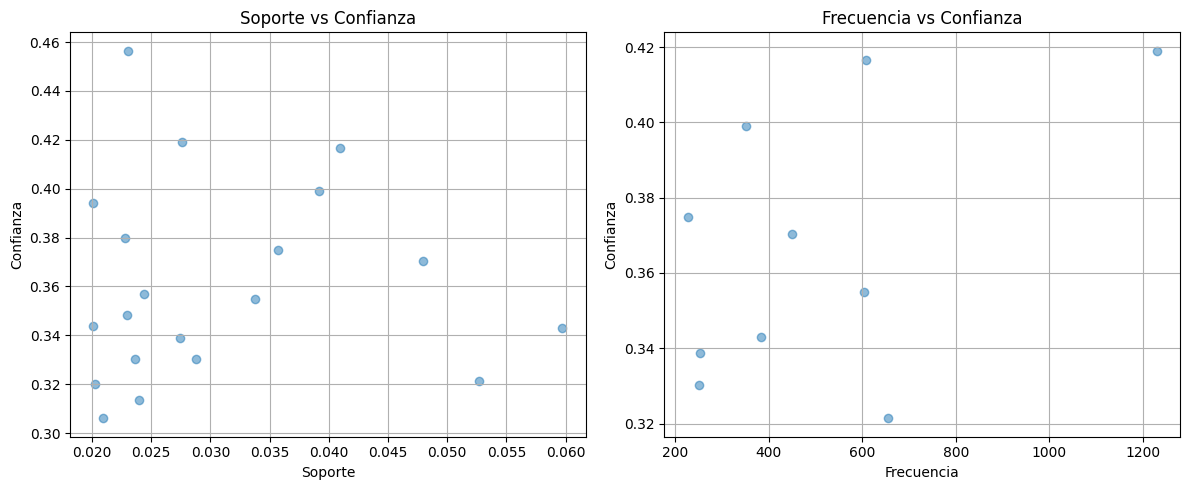

In [ ]:
# Calcular la frecuencia de los itemsets frecuentes
frequent_itemsets22['frequency'] = frequent_itemsets22['support'] * total_transactions

# Fusionar los datos relevantes en un solo DataFrame
merged_data = pd.concat([frequent_itemsets22, rules_filtradas22], axis=1)
# Crear una figura con dos subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Soporte vs Confianza
plt.subplot(1, 2, 1)
plt.scatter(rules_filtradas2['support'], rules_filtradas2['confidence'], alpha=0.5)
plt.title('Soporte vs Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.grid(True)

# Subplot 2: Frecuencia vs Confianza
plt.subplot(1, 2, 2)
plt.scatter(merged_data['frequency'], merged_data['confidence'], alpha=0.5)
plt.title('Frecuencia vs Confianza')
plt.xlabel('Frecuencia')
plt.ylabel('Confianza')
plt.grid(True)

# Ajustar y mostrar la figura
plt.tight_layout()
plt.show()

Al igual que en la configuración anterior, vuelve a ser mejor utilizar el soporte a la frecuencia porque aparacen más reglas y de mayor confianza.

Representación de las reglas y dado el antecesor, cuántas veces aparece:

In [ ]:
from collections import defaultdict

# Crear un diccionario para almacenar el conteo de los antecedentes
conteo_antecedentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas2.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1

# Imprimir el conteo de cada antecedente
for antecedente, conteo in conteo_antecedentes.items():
    print(f"El antecedente '{antecedente}' aparece {conteo} veces.")

El antecedente 'burgers' aparece 1 veces.
El antecedente 'cake' aparece 1 veces.
El antecedente 'chicken' aparece 1 veces.
El antecedente 'chocolate' aparece 1 veces.
El antecedente 'cooking oil' aparece 1 veces.
El antecedente 'frozen smoothie' aparece 1 veces.
El antecedente 'frozen vegetables' aparece 1 veces.
El antecedente 'ground beef' aparece 2 veces.
El antecedente 'low fat yogurt' aparece 1 veces.
El antecedente 'milk' aparece 1 veces.
El antecedente 'olive oil' aparece 2 veces.
El antecedente 'pancakes' aparece 1 veces.
El antecedente 'shrimp' aparece 1 veces.
El antecedente 'soup' aparece 1 veces.
El antecedente 'spaghetti' aparece 1 veces.
El antecedente 'tomatoes' aparece 2 veces.
El antecedente 'whole wheat rice' aparece 1 veces.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


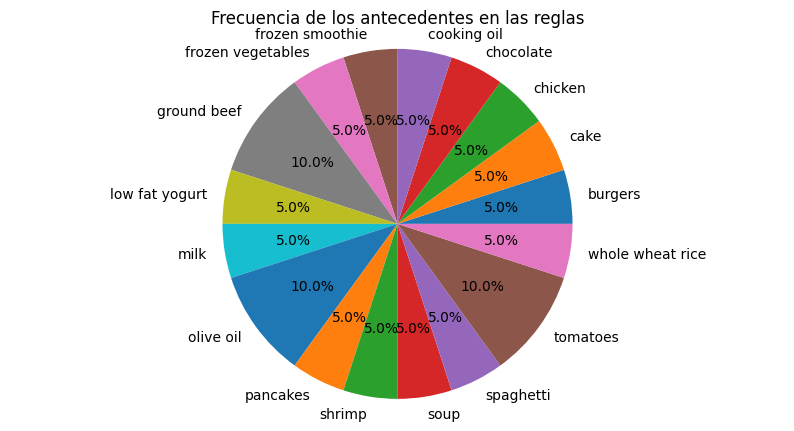

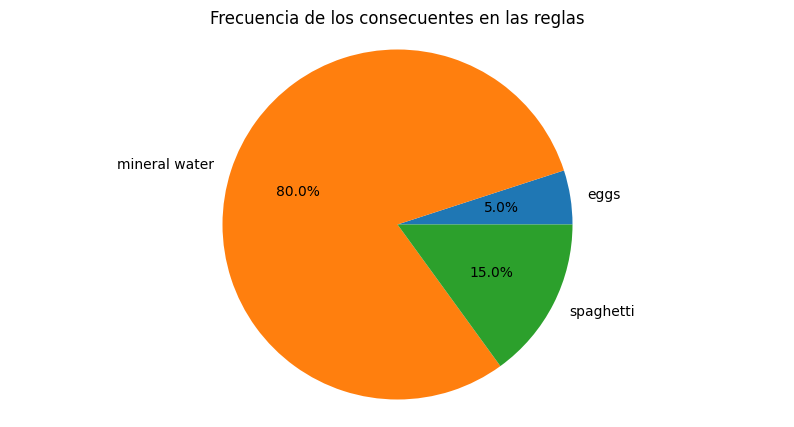

In [ ]:
import matplotlib.pyplot as plt

# Obtener conteo de antecedentes y consecuentes
conteo_antecedentes = defaultdict(int)
conteo_consecuentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas2.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1
    for consecuente in rule['consequents']:
        conteo_consecuentes[consecuente] += 1

# Crear pie chart para los antecedentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_antecedentes.values(), labels=conteo_antecedentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los antecedentes en las reglas')
plt.axis('equal')
plt.show()

# Crear pie chart para los consecuentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_consecuentes.values(), labels=conteo_consecuentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los consecuentes en las reglas')
plt.axis('equal')
plt.show()

Con este soporte vemos que ya no hay una clara dominancia de algunos ítems en los antecedentes, sino que están todos bastante equiparados. Pero, el consecuente principal sigue siendo 'mineral water'. Como consecuente aparece 'eggs' lo cual es mejor. Nos damos cuenta de que aumentando el soporte y reduciendo la confianza aparecen reglas más variadas, añadiendo 'eggs' a los consecuentes. Se crean reglas de menos confianza pero se generalizará más

Por último probaremos con un soporte de 0.03

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets3 = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3


rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.3)

rules_filtradas3 = rules3[rules3['lift'] > 1]
print(rules_filtradas3)
reglas_eliminadas3 = len(rules3) - len(rules_filtradas3)

print(' se han eliminado: ', reglas_eliminadas3, 'reglas')

           antecedents      consequents  antecedent support  \
0          (chocolate)  (mineral water)            0.163845   
1  (frozen vegetables)  (mineral water)            0.095321   
2        (ground beef)  (mineral water)            0.098254   
3        (ground beef)      (spaghetti)            0.098254   
4               (milk)  (mineral water)            0.129583   
5           (pancakes)  (mineral water)            0.095054   
6          (spaghetti)  (mineral water)            0.174110   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.238368  0.052660    0.321400  1.348332  0.013604    1.122357   
1            0.238368  0.035729    0.374825  1.572463  0.013007    1.218270   
2            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401   
3            0.174110  0.039195    0.398915  2.291162  0.022088    1.373997   
4            0.238368  0.047994    0.370370  1.553774  0.017105    1.209650   
5            0.238368

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tenemos muchas menos reglas que antes con este soporte, pero vemos que nuevamente, todas son válidas y buenas. Tiene sentido que se mantengan las de mineral water, ya que casi todos compran mineral water. Por otro lado aparece 'ground beef' con 'espaguetti' esto también es una regla coherente ya que es una receta muy común y comprar estos dos elementos juntos no es algo atípico.

In [ ]:
# Calcular la frecuencia mínima deseada
min_frequency = 300

# Calcular el número total de transacciones
total_transactions = len(data)

# Convertir la frecuencia mínima en soporte
min_support = min_frequency / total_transactions


frequent_itemsets33 = apriori(data, min_support=min_support, use_colnames=True)
frequent_itemsets33['length'] = frequent_itemsets33['itemsets'].apply(lambda x: len(x))
frequent_itemsets33

rules33 = association_rules(frequent_itemsets33, metric="confidence", min_threshold=0.3)

rules_filtradas33 = rules33[rules11['lift'] > 1]
print(rules_filtradas33)
reglas_eliminadas33 = len(rules33) - len(rules_filtradas33)
print(' se han eliminado: ', reglas_eliminadas33, 'reglas')

     antecedents      consequents  antecedent support  consequent support  \
0    (chocolate)  (mineral water)            0.163845            0.238368   
1  (ground beef)  (mineral water)            0.098254            0.238368   
2         (milk)  (mineral water)            0.129583            0.238368   
3    (spaghetti)  (mineral water)            0.174110            0.238368   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.052660    0.321400  1.348332  0.013604    1.122357       0.308965  
1  0.040928    0.416554  1.747522  0.017507    1.305401       0.474369  
2  0.047994    0.370370  1.553774  0.017105    1.209650       0.409465  
3  0.059725    0.343032  1.439085  0.018223    1.159314       0.369437  
 se han eliminado:  0 reglas


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-8eb487a600fa>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules_filtradas33 = rules33[rules11['lift'] > 1]


Representación gráfica y dado el antecesor cuántas veces aparece:

In [ ]:
from collections import defaultdict

# Crear un diccionario para almacenar el conteo de los antecedentes
conteo_antecedentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas3.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1

# Imprimir el conteo de cada antecedente
for antecedente, conteo in conteo_antecedentes.items():
    print(f"El antecedente '{antecedente}' aparece {conteo} veces.")

El antecedente 'chocolate' aparece 1 veces.
El antecedente 'frozen vegetables' aparece 1 veces.
El antecedente 'ground beef' aparece 2 veces.
El antecedente 'milk' aparece 1 veces.
El antecedente 'pancakes' aparece 1 veces.
El antecedente 'spaghetti' aparece 1 veces.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


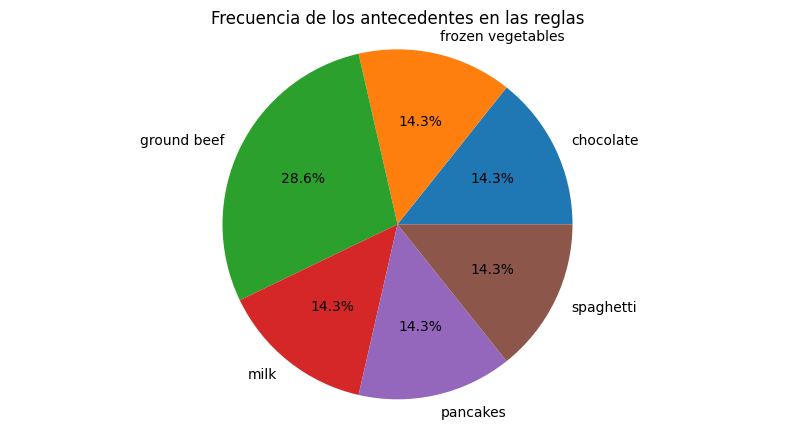

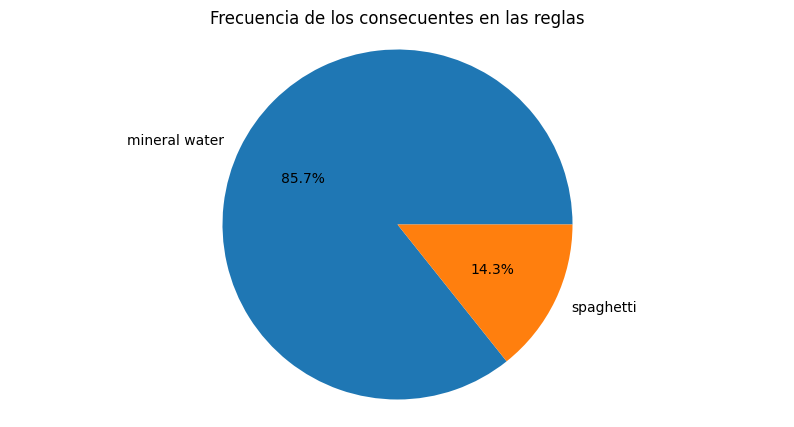

In [ ]:
import matplotlib.pyplot as plt

# Obtener conteo de antecedentes y consecuentes
conteo_antecedentes = defaultdict(int)
conteo_consecuentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas3.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1
    for consecuente in rule['consequents']:
        conteo_consecuentes[consecuente] += 1

# Crear pie chart para los antecedentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_antecedentes.values(), labels=conteo_antecedentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los antecedentes en las reglas')
plt.axis('equal')
plt.show()

# Crear pie chart para los consecuentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_consecuentes.values(), labels=conteo_consecuentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los consecuentes en las reglas')
plt.axis('equal')
plt.show()

Con este soporte tan alto aparecen menos reglas, ya no aparece 'eggs' en el consecuente y los antecedentes tienen frecuencias muy parecidas, menos 'ground beef' al igual que en las anteriores. En este caso, no consideramos una mejora el aumento de soporte con la misma confianza, se reducen mucho las reglas y se eliminan las que añadían un poco de variedad a las ya existentes.

Para mejorar respecto al anterior lo que debemos hacer es disminuir la confianza a medida que aumentamos el soporte, así saldrán más reglas. Probamos filtrándolas por lift para que salgan buenas reglas:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


            antecedents      consequents  antecedent support  \
0           (chocolate)           (eggs)            0.163845   
1        (french fries)      (chocolate)            0.170911   
2           (chocolate)   (french fries)            0.163845   
3                (milk)      (chocolate)            0.129583   
4       (mineral water)      (chocolate)            0.238368   
5           (chocolate)  (mineral water)            0.163845   
6           (spaghetti)      (chocolate)            0.174110   
7           (chocolate)      (spaghetti)            0.163845   
8                (eggs)   (french fries)            0.179709   
9        (french fries)           (eggs)            0.170911   
10               (milk)           (eggs)            0.129583   
11      (mineral water)           (eggs)            0.238368   
12               (eggs)  (mineral water)            0.179709   
13               (eggs)      (spaghetti)            0.179709   
14          (spaghetti)           (eggs)

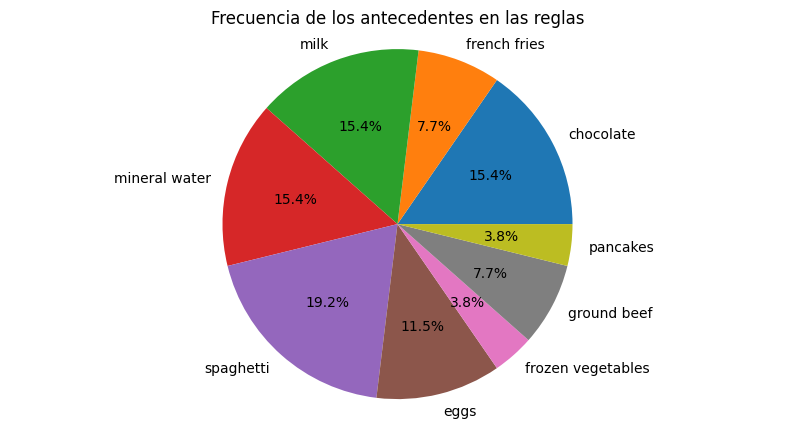

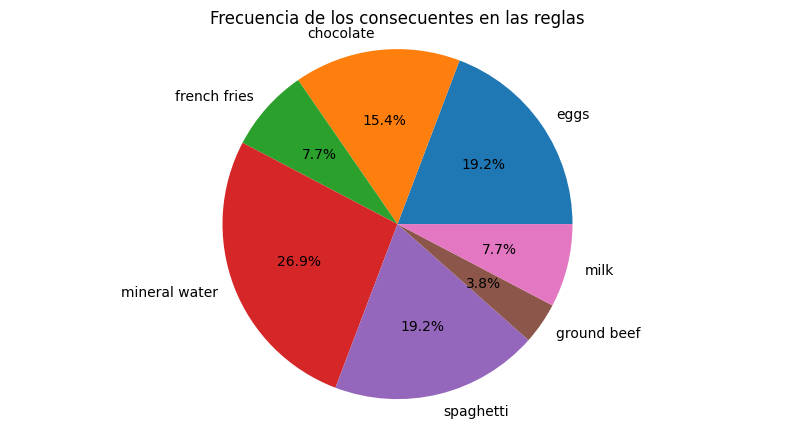

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets333 = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets333['length'] = frequent_itemsets333['itemsets'].apply(lambda x: len(x))
frequent_itemsets333


rules333 = association_rules(frequent_itemsets333, metric="confidence", min_threshold=0.2)

rules_filtradas333 = rules333[rules333['lift'] > 1]
print(rules_filtradas333)
reglas_eliminadas333 = len(rules333) - len(rules_filtradas333)

print(' se han eliminado: ', reglas_eliminadas333, 'reglas')


# representación:

import matplotlib.pyplot as plt

# Obtener conteo de antecedentes y consecuentes
conteo_antecedentes = defaultdict(int)
conteo_consecuentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas333.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1
    for consecuente in rule['consequents']:
        conteo_consecuentes[consecuente] += 1

# Crear pie chart para los antecedentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_antecedentes.values(), labels=conteo_antecedentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los antecedentes en las reglas')
plt.axis('equal')
plt.show()

# Crear pie chart para los consecuentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_consecuentes.values(), labels=conteo_consecuentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los consecuentes en las reglas')
plt.axis('equal')
plt.show()

Efectivamente, salen reglas más variadas que antes, con esto estamos generalizando más y podemos sacar más conclusiones de las reglas. Sabemos que casi todos compran 'mineral water' y 'espaguetti', pero nos surgen nuevas reglas con 'french fries' de consecuente, lo cual tiene sentido ya que es uno de los ítems más frecuentes, ocurre lo mismo con 'chocolate'.



Al analizar las reglas obtenidas del algoritmo Apriori, se pueden identificar algunas asociaciones entre productos que son previsibles y comunes en los hábitos de compra de los clientes.Por ejemplo, la relación entre "chocolate" y "milk", y entre "milk" y "eggs", refleja la tendencia a adquirir productos utilizados en la preparación de postres, algo común en la cocina casera.

De manera similar, la presencia de patatas fritas en la cesta de compra se relaciona con la compra de chocolate, lo cual sugiere una preferencia general por estos productos como aperitivos.

Además, la asociación entre "chocolate" y "spaghetti" es inusual y podría considerarse una combinación peculiar. Del mismo modo, la conexión entre "spaghetti" y "milk" podría relacionarse con la preparación de carbonara, aunque inicialmente no sea intuitiva.

También es notable la asociación entre "spaghetti" y "ground beef", lo cual sugiere la preparación de pasta boloñesa, un plato bastante común.

Es relevante señalar la alta incidencia de compras de agua mineral y pasta en general. Esta tendencia sugiere una demanda constante de estos productos, quizás debido a su versatilidad en la cocina o a su uso común en la dieta diaria de los clientes.





Ahora vamos a probar otra métrica diferente a la confianza. Analizaremos las reglas que se crean con el algoritmo apriori utilizando como métrica el lift.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


            antecedents          consequents  antecedent support  \
0                (eggs)          (chocolate)            0.179709   
1           (chocolate)               (eggs)            0.163845   
2        (french fries)          (chocolate)            0.170911   
3           (chocolate)       (french fries)            0.163845   
4                (milk)          (chocolate)            0.129583   
5           (chocolate)               (milk)            0.163845   
6       (mineral water)          (chocolate)            0.238368   
7           (chocolate)      (mineral water)            0.163845   
8           (spaghetti)          (chocolate)            0.174110   
9           (chocolate)          (spaghetti)            0.163845   
10               (eggs)       (french fries)            0.179709   
11       (french fries)               (eggs)            0.170911   
12               (eggs)               (milk)            0.179709   
13               (milk)               (eggs)    

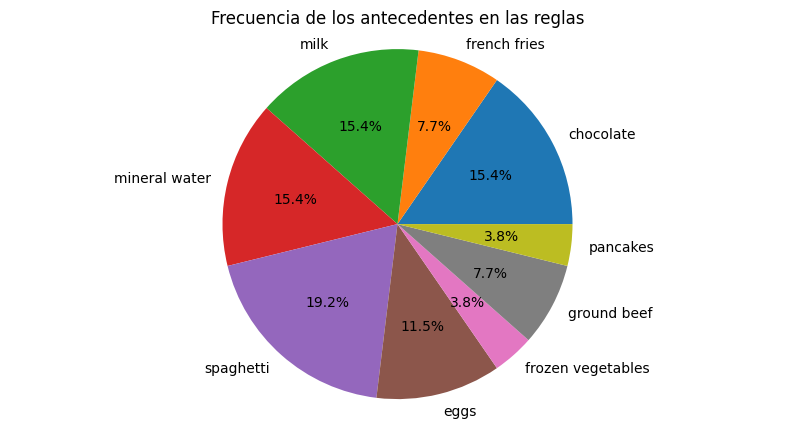

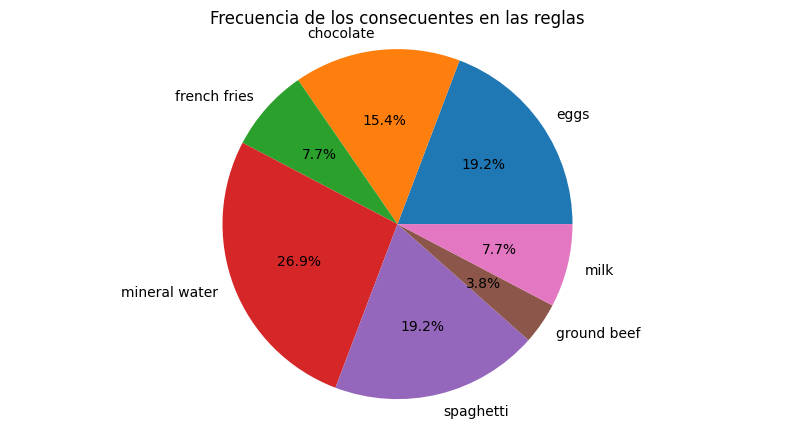

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets4 = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets4['length'] = frequent_itemsets4['itemsets'].apply(lambda x: len(x))
frequent_itemsets4


rules4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=0.2)

rules_filtradas4 = rules4[rules4['lift'] > 1]
print(rules_filtradas4)
reglas_eliminadas4 = len(rules4) - len(rules_filtradas4)

print(' se han eliminado: ', reglas_eliminadas4, 'reglas')


# representación:

import matplotlib.pyplot as plt

# Obtener conteo de antecedentes y consecuentes
conteo_antecedentes = defaultdict(int)
conteo_consecuentes = defaultdict(int)

# Iterar sobre todas las reglas filtradas
for index, rule in rules_filtradas333.iterrows():
    for antecedente in rule['antecedents']:
        conteo_antecedentes[antecedente] += 1
    for consecuente in rule['consequents']:
        conteo_consecuentes[consecuente] += 1

# Crear pie chart para los antecedentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_antecedentes.values(), labels=conteo_antecedentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los antecedentes en las reglas')
plt.axis('equal')
plt.show()

# Crear pie chart para los consecuentes
plt.figure(figsize=(10, 5))
plt.pie(conteo_consecuentes.values(), labels=conteo_consecuentes.keys(), autopct='%1.1f%%')
plt.title('Frecuencia de los consecuentes en las reglas')
plt.axis('equal')
plt.show()

Vemos que utilizando como métrica lift en vez de confianza (y dejando constante el soporte) obtenemos más reglas. Con la métrica de confianza obteníamos 26 reglas y con la de lift hemos obtenido 32. Sin embargo, más reglas no significa que sea mejor. Estudiaremos la calidad de las reglas con el siguiente gráfico.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


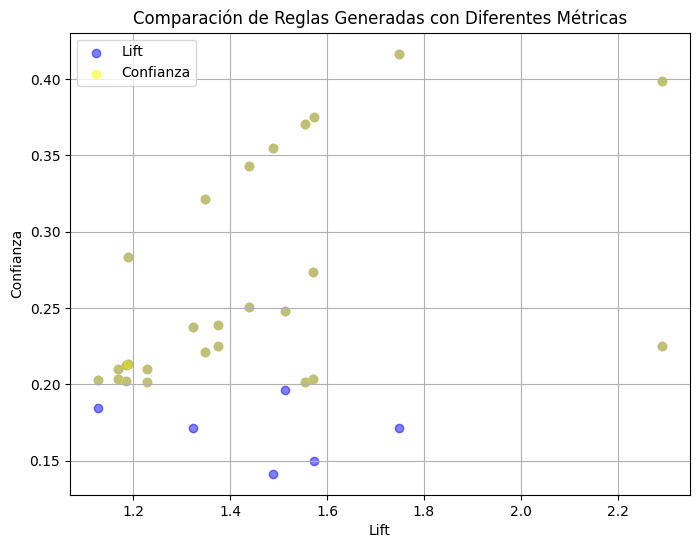

In [ ]:
# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(rules_filtradas4['lift'], rules_filtradas4['confidence'], label='Lift', alpha=0.5, color='blue')
plt.scatter(rules_filtradas333['lift'], rules_filtradas333['confidence'], label='Confianza', alpha=0.5, color='yellow')
plt.title('Comparación de Reglas Generadas con Diferentes Métricas')
plt.xlabel('Lift')
plt.ylabel('Confianza')
plt.legend()
plt.grid(True)
plt.show()

La observación del gráfico de dispersión revela una diferencia significativa en la cantidad de reglas generadas entre la métrica de confianza y la de lift. Se destaca que existe un mayor número de reglas asociadas con la métrica de lift en comparación con la de confianza. Es importante señalar que todas las reglas identificadas mediante la métrica de confianza están contenidas dentro del conjunto de reglas obtenidas a través de la métrica de lift, lo que se evidencia por la superposición de los puntos en la gráfica. Esta superposición se manifiesta mediante la tonalidad más oscura de amarillo en los puntos, indicando que las reglas coincidentes son representadas por puntos que se sobrepasan entre sí en el gráfico.

Además, se observa que las reglas adicionales obtenidas mediante la métrica de lift exhiben una confianza notablemente baja en comparación con las reglas previamente obtenidas con la métrica de confianza. Esta discrepancia en la confianza de las reglas adicionales sugiere que estas podrían tener una menor fiabilidad o relevancia en comparación con las reglas generadas originalmente.

En consecuencia, se concluye que la métrica de confianza proporciona un conjunto más selecto de reglas con una confianza más alta, lo que implica una mayor fiabilidad en la asociación entre los elementos antecedentes y consecuentes. Aunque la métrica de lift puede generar un número mayor de reglas, estas pueden ser menos confiables debido a su baja confianza. Por lo tanto, en función de la confiabilidad y relevancia de las reglas, se prefiere la métrica de confianza sobre la métrica de lift.

## Práctica 2 (Patrones Secuenciales)

El conjunto de datos “Online Retail.xlsx” contiene productos (definidos por la columna StockCode y Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes momentos (definidos por el campo InvoiceDate). Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes (2 puntos). Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la librería gsppy.

Prueba al menos dos configuraciones de soporte diferentes. (1 punto)

Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos. (1 punto)

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan(1 punto)

Librería gsppy:
Podéis encontrar su documentación en el siguiente enlace: https://pypi.org/project/gsppy/

Se procede a la lectura del archivo de trabajo, "Online Retail.xlsx", cuyo contenido se descargará sobre el objeto DataFrame de la librería pandas. La información recogida en la tabla se reparte en las siguientes variables o columnas:

* **InvoiceNo**: Número identificador de la factura de compra.

* **StockCode**: Código asociado al producto o artículo.

* **Description**: Descripción cualitativa del producto.

* **Quantity**: Cantidad numérica de artículos de un mismo tipo comprados.

* **InvoiceDate**: Fecha y hora de compra.

* **UnitPrice**: Precio unitario del producto.

* **CustomerID**: Código identificador del cliente.

* **Country**: País desde el que se ha realizado la compra.

Se cargan las librerias necesarias para nuestro código. Además, se instala la herramienta ```gsp-python``` que nos servirá para aplicar el algoritmo *GSP* (Generalized Sequential Patterns) de identificación de patrones secuenciales.

In [ ]:
pip install gsp-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Librerías necesarias
from google.colab import files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from gsp_python.gsp import GSP

import warnings
warnings.filterwarnings("ignore")

# logging.getLogger('matplotlib.font_manager').disabled = True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Selección de los datos

Subimos la base de datos con la que tenemos que trabajar.

In [ ]:
# Carga del archivo al directorio de trabajo
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
file_path = 'Online Retail.xlsx'

# Guarda el archivo Excel en el DataFrame
df_original = pd.read_excel(file_path)

# Visualización inicial
df_original.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Preparación y limpieza de los datos

La primera fase que se llevará a cabo para el análisis de la base de datos incluye la limpieza y preparación de estos. Para ello, extraen los tipos de variables con los que se trabajará.

In [ ]:
print(df_original.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


Se observa que, a excepción de las variables *Quantity*, *UnitPrice* y *CustomerID*, la mayoría de las columnas del DataFrame están definidas por campos de tipo *object*. Asimismo, la variable *InvoiceDate* recoge la información siguiendo el formato *datetime64*, que incluye el momento exacto de compra (fecha y hora).

Ahora veamos con cuantas filas contamos.

In [ ]:
# Obtener el número de filas en el DataFrame
num_filas_orig = len(df_original)

# Mostrar el resultado
print(f"Número de filas en el DataFrame: {num_filas_orig}")

Número de filas en el DataFrame: 541909


Con el fin de evitar encontrar posibles ambigüedades en cuanto a los códigos de identificación, se homogeneizan las columnas cuyos campos pueden contener caracteres de tipo ```str``` y se definen todas las letras contenidas en la base de datos como mayúsculas.

In [ ]:
# Se crea una copia del DataFrame original sobre el que se trabajará para evitar
# perder información importante
df = df_original.copy()

In [ ]:
# Identificación de las columnas tipo object
str_columns = df.select_dtypes(include=['object']).columns

for col in str_columns:
  indices = df[df[col].astype(str).str.contains('[a-zA-Z]')].index.tolist()
  df[col][indices] = df[col][indices].str.upper()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,UNITED KINGDOM
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,UNITED KINGDOM
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,UNITED KINGDOM


Seguidamente, como parte de la limpieza del DataFrame, se comienza eliminando los campos duplicados en la tabla, en caso de que haya.

In [ ]:
df = df.drop_duplicates()
num_dupl = num_filas_orig - len(df)

print(f'Se han eliminado {num_dupl} duplicados.\nNúmero de registros actualidado: {len(df)}')

Se han eliminado 5268 duplicados.
Número de registros actualidado: 536641


Uno de los casos más conflictivos en el proceso de limpieza de un DataFrame es el **tratamiento de los valores NaN** presentes en el dataset. Para ello, se calculará la cantidad de celdas vacías del DataFrame por columnas.

In [ ]:
# Calcula la cantidad de NaN en cada columna
nan_count = df.isna().sum()

# Imprime el resultado
print("NaN por columna:")
print(nan_count)

NaN por columna:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


Se observa que la única columna que presenta este tipo de datos es la de 'Description'.

A continuación, observamos el aspecto de los registros que presentan NaN para comprobar si se encuentran más anomalías en las columnas restantes coincidiendo con este suceso y analizar las estrategias que se pueden llevar a cabo para para solucionar el problema.

In [ ]:
# Filtra y muestra las filas donde haya NaN en la columna especificada
filas_con_nan = df.loc[df['Description'].isna()]

# Imprime el resultado
print(f"Filas con NaN en la columna '{'Description'}': {len(filas_con_nan)}")
filas_con_nan.head()

Filas con NaN en la columna 'Description': 1454


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,UNITED KINGDOM
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,UNITED KINGDOM
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,UNITED KINGDOM
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,UNITED KINGDOM
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,UNITED KINGDOM


Vemos que muchas de las filas con campos vacíos en el nombre del producto tampoco tienen un precio asociado; en su lugar, se les ha asignado un precio de ```0.0```. Se recurre al código de Stock, identificador del artículo, para rellenar estos valores.

In [ ]:
for i, row in filas_con_nan.iterrows():
    stock_code = row['StockCode']

    # Extraer las filas sin valores NaN cuyo 'StockCode' coincida
    info_stock_code = df[(df['StockCode'] == stock_code) & ~df['Description'].isna() & ~df['UnitPrice'].isna()]

    # Si se ha encontrado la información alternativa
    if not info_stock_code.empty:
        # Obtener la información de la primera fila
        info_stock_code = info_stock_code.iloc[0]

        # Asignar los valores correspondientes
        df.at[i, 'Description'] = info_stock_code['Description']
        df.at[i, 'UnitPrice'] = info_stock_code['UnitPrice']

# Observamos los cambios realizados
df.loc[filas_con_nan.index.tolist()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2010-12-01 11:52:00,4.25,15287,UNITED KINGDOM
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,15287,UNITED KINGDOM
1971,536546,22145,CHRISTMAS CRAFT HEART STOCKING,1,2010-12-01 14:33:00,2.10,15287,UNITED KINGDOM
1972,536547,37509,NEW ENGLAND MUG W GIFT BOX,1,2010-12-01 14:33:00,2.55,15287,UNITED KINGDOM
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,15287,UNITED KINGDOM
...,...,...,...,...,...,...,...,...
535322,581199,84581,DOG TOY WITH PINK CROCHET SKIRT,-2,2011-12-07 18:26:00,4.21,15287,UNITED KINGDOM
535326,581203,23406,HOME SWEET HOME KEY HOLDER,15,2011-12-07 18:31:00,6.25,15287,UNITED KINGDOM
535332,581209,21620,SET OF 4 ROSE BOTANICAL CANDLES,6,2011-12-07 18:35:00,3.75,15287,UNITED KINGDOM
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,1.25,15287,UNITED KINGDOM


Una vez se han rellenado todos los campos posibles con la información de otros registros, comprobamos si todavía quedan NaN presentes en la base de datos.

In [ ]:
nan_count = df.isna().sum()

print("NaN por columna:")
print(nan_count)

NaN por columna:
InvoiceNo        0
StockCode        0
Description    110
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64


A pesar de esto, se siguen dando valores vacíos para algunos casos. Se comprueba si se han recuperado todos los datos posibles a través del StockCode.

In [ ]:
# Dividimos el DataFrame según si tienen NaN o no
df_con_nan = df[df['Description'].isna()]
df_sin_nan = df.dropna(subset=['Description'])

ind_nan = df_con_nan['StockCode'].tolist()
ind_sin = df_sin_nan['StockCode'].tolist()

# Se extraen los StockCodes con NaN en Description que no estén en la lista de
# registros completos
# Resta de conjuntos
resultado_resta = [item for item in ind_nan if item not in ind_sin]

if len(resultado_resta) == len(ind_nan):
  print('Se han recuperado todos los datos posibles a través del StockCode')

Se han recuperado todos los datos posibles a través del StockCode


Los códigos de Stock de los registros sin descripción no se encuentran en el resto del dataframe y, como consecuencia, no se pueden sacar conclusiones sobre estos registros. Por lo tanto, se procede a eliminar estas filas vacías.

In [ ]:
# Identificar las filas a eliminar
filas_a_eliminar = df[df['Description'].isna()]
df = df.drop(filas_a_eliminar.index)

# Calcula la cantidad de NaN en cada columna
nan_count = df.isna().sum()

print("NaN por columna:")
print(nan_count)

NaN por columna:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Comprobemos con cuántos registros nos hemos quedado:

In [ ]:
# Obtener el número de filas en el DataFrame
num_filas = len(df)

# Mostrar el resultado
print(f"Número de filas antes de la limpieza de NaN: {num_filas_orig - num_dupl}")
print(f"Número de filas después de la limpieza de NaN: {num_filas}")
print(f"Se han eliminado {num_filas_orig - num_dupl - num_filas} filas")

Número de filas antes de la limpieza de NaN: 536641
Número de filas después de la limpieza de NaN: 536531
Se han eliminado 110 filas


#### Estudio de las columnas de datos numéricos

A continuación, se procede a evaluar la validez de los datos numéricos en la base de datos resultante. Recordemos que las variables que tomaban este tipo de datos incluían ***Quantity***, ***UnitPrice*** y ***CustomerID***. La columna de *CustomerID* no se considera que esté expuesta a condiciones respecto al valor que pueda tomar, luego el estudio se centrará en los dos primeros atributos mencionados.

Se comenzará obteniendo el resumen estadístico de ambas columnas con el fin de ofrecer una visión general sobre sus valores así como la identificación de posibles incongruencias en los datos.

In [ ]:
resumen = df[['Quantity', 'UnitPrice']].describe()
resumen = resumen.drop('count')
resumen = resumen.round(3)
print(resumen)

       Quantity  UnitPrice
mean      9.624      4.646
std     219.152     97.247
min  -80995.000 -11062.060
25%       1.000      1.250
50%       3.000      2.080
75%      10.000      4.130
max   80995.000  38970.000


Bien si la variable 'UnitPrice' puede admitir valores decimales, es importante asegurar que los valores que toma la columna 'Quantity' son números enteros antes de seguir con el análisis.

In [ ]:
# Se localizan mediante valores booleanos si algún registro para Quantity no se
# puede expresar como valor de tipo entero
valores_no_enteros = df['Quantity'].astype(int) != df['Quantity']

if valores_no_enteros.any():
    print("Hay valores no enteros en la columna")
else:
    print("Todos los valores de Quantity son enteros")

Todos los valores de Quantity son enteros


**Tratamiento de los valores negativos**

Una vez se garantiza que no existen registros en los que la cantidad de artículos se exprese como valores fraccionales, se procede a estudiar aquellos casos en los que las variables numéricas toman cantidades negativas.

Se comenzará estudiando la columna 'Quantity'.

In [ ]:
num_negativos = (df['Quantity'] < 0).sum()
print(f'Hay {num_negativos} registros de cantidades negativas')

Hay 10490 registros de cantidades negativas


In [ ]:
print(df.loc[(df['Quantity'] < 0), 'Description'].head())

141                            DISCOUNT
154     SET OF 3 COLOURED  FLYING DUCKS
235      PLASTERS IN TIN CIRCUS PARADE 
236    PACK OF 12 PINK PAISLEY TISSUES 
237    PACK OF 12 BLUE PAISLEY TISSUES 
Name: Description, dtype: object


El hecho de que esta clase de valores pueda tomar valores negativos se justifica mediante los movimientos de devolución que se pueden dar en las páginas de Retail y la elección de cantidades negativas para reflejar este tipo de movimientos. Asimismo, los descuentos aplicados sobre el precio total de algunos productos que se efectúan en una compra utilizan valores negativos en el campo *Quantity* para reflejar este movimiento.

No obstante, la finalidad de este documento es el estudio del secuenciamiento de compras. Por lo tanto, se eliminan estos registros.

In [ ]:
df = df.drop(df[df['Quantity'] < 0].index)

Continuamos con la evaluación de los valores en la columna 'UnitPrice'.

In [ ]:
num_negativos = (df['UnitPrice'] < 0).sum()

print(num_negativos)
print(df.loc[df['UnitPrice'] < 0])

2
       InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  ADJUST BAD DEBT         1 2011-08-12 14:51:00   
299984   A563187         B  ADJUST BAD DEBT         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06       15287  UNITED KINGDOM  
299984  -11062.06       15287  UNITED KINGDOM  


Se observa que el precio negativo se da tan solo dos veces y coincide con la compra de un mismo producto. No obstante, a partir del código de stock de esta transacción *ADJUST BAD DEBT*, estos valores negativos en la cuenta se corresponden con ajustes en las deudas del negocio o empresa. Por lo tanto, a pesar de no ser datos erróneos, no se consideran movimientos significativos para el objeto de estudio de patrones secuenciales, pues no representan artículos reales ofrecidos por la empresa de retail.

In [ ]:
df = df.drop(df[df['UnitPrice'] < 0].index)

Además, se ha observado previamente en el resumen estadístico que algunos de los 'artículos' presentan valores monetarios desorbitados en comparación con el resto de registros. Se quiere asegurar que estos movimientos estén asociados a productos reales exclusivamente, pues son el objeto principal para la consecución de este trabajo.

In [ ]:
# Reordenamos el DataFrame de mayor a menor precio
df_ordenado = df.sort_values(by='UnitPrice', ascending=False)

# Se seleccionan los primeros cinco registros
primeros_cinco = df_ordenado.head(5)
print(primeros_cinco)

       InvoiceNo  StockCode      Description  Quantity         InvoiceDate  \
15017     537632  AMAZONFEE       AMAZON FEE         1 2010-12-07 15:08:00   
299982   A563185          B  ADJUST BAD DEBT         1 2011-08-12 14:50:00   
173382    551697       POST          POSTAGE         1 2011-05-03 13:46:00   
297723    562955        DOT   DOTCOM POSTAGE         1 2011-08-11 10:14:00   
268028    560373          M           MANUAL         1 2011-07-18 12:30:00   

        UnitPrice  CustomerID         Country  
15017    13541.33       15287  UNITED KINGDOM  
299982   11062.06       15287  UNITED KINGDOM  
173382    8142.75       16029  UNITED KINGDOM  
297723    4505.17       15287  UNITED KINGDOM  
268028    4287.63       15287  UNITED KINGDOM  


Observamos que el código de stock llamado *AMAZONFEE* no está relacionado con compras de clientes, sino que se trata de pagos que la propia empresa asume. Luego se eliminarán este tipo de movimientos.

Mientras que no se puede conocer con certeza la naturaleza de los registros asociados al código *M*, se encuentran otros códigos de stock más intuitivos. En concreto, se eliminará el movimiento relacionado con el ajuste de deudas de la empresa de retail (*ADJUST BAD DEBT*). Asimismo, se observa que el DataFrame incluye los pagos con los que la empresa ha tenido que contar en relación con gastos de envío (*POSTAGE*, *DOTCOM POSTAGE*). Como no se tratan de artículos específicos de retail, no resultan de interés en el posterior estudio de patrones secuenciales.

In [ ]:
df = df.drop(df[df['StockCode'].isin(['AMAZONFEE', 'B', 'POST', 'DOT'])].index)

Volvemos a observar los movimientos de mayor precio.

In [ ]:
# Reordenamos el DataFrame de mayor a menor precio
df_ordenado = df.sort_values(by='UnitPrice', ascending=False)

# Se seleccionan los primeros cinco registros
primeros_cinco = df_ordenado.head(5)
print(primeros_cinco)

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
268028    560373         M      MANUAL         1 2011-07-18 12:30:00   
422376    573080         M      MANUAL         1 2011-10-27 14:20:00   
422351    573077         M      MANUAL         1 2011-10-27 14:13:00   
406406    571751         M      MANUAL         1 2011-10-19 11:18:00   
374542    569382         M      MANUAL         1 2011-10-03 16:44:00   

        UnitPrice  CustomerID         Country  
268028    4287.63       15287  UNITED KINGDOM  
422376    4161.06       12536          FRANCE  
422351    4161.06       12536          FRANCE  
406406    3949.32       12744       SINGAPORE  
374542    3155.95       15502  UNITED KINGDOM  


Como no se puede conocer con seguridad la naturaleza de los movimientos asociados con el StockCode *M*, de momento no se eliminan de la base de datos. No obstante, se hará un análisis más exhaustivo de la distribución de los precios asociados a este código con el fin de aceptar o rechazar su validez dentro del estudio de patrones secuenciales.

In [ ]:
print(df.loc[df['StockCode']=='M', 'UnitPrice'].describe().round(3))

count     323.000
mean      229.416
std       647.808
min         0.000
25%         0.575
50%         1.650
75%        37.500
max      4287.630
Name: UnitPrice, dtype: float64


A pesar de concentrar la mayoría de sus precios unitarios en un rango relativamente común de acuerdo a los artículos presentes en la base de datos, los movimientos asociados al StockCode *M* no se pueden considerar útiles o comprensibles en el contexto de trabajo ya que resulta imposible conocer de qué se trata. Además, se observa que de los 323 registros asociados a este código de stock, los precios oscilan gravemente, con una desviación estándar de cerca de 647 libras. Luego se procede a eliminar estos registros.

In [ ]:
df = df.drop(df[df['StockCode'] == 'M'].index)

Se continúa el análisis de los precios más altos presentes en la base de datos.

In [ ]:
# Reordenamos el DataFrame de mayor a menor precio
df_ordenado = df.sort_values(by='UnitPrice', ascending=False)

# Se seleccionan los primeros cinco registros
primeros_cinco = df_ordenado.head(5)
print(primeros_cinco)

       InvoiceNo StockCode                     Description  Quantity  \
222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
222682    556446     22502  PICNIC BASKET WICKER 60 PIECES         1   
171178    551393     22656    VINTAGE BLUE KITCHEN CABINET         1   
133994    547814     22656    VINTAGE BLUE KITCHEN CABINET         1   
205759    554836     22655     VINTAGE RED KITCHEN CABINET         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
222680 2011-06-10 15:28:00      649.5       15098  UNITED KINGDOM  
222682 2011-06-10 15:33:00      649.5       15098  UNITED KINGDOM  
171178 2011-04-28 12:22:00      295.0       14973  UNITED KINGDOM  
133994 2011-03-25 14:19:00      295.0       13452  UNITED KINGDOM  
205759 2011-05-26 16:25:00      295.0       13015  UNITED KINGDOM  


Se observa que el resto de registros asociados ya a precios entorno a las 650 libras se corresponden con artículos a la venta en la página web. Por lo tanto, se concluye el estudio de estos valores.

A continuación, se procederá a examinar los valores nulos para el mismo atributo de 'UnitPrice'.

In [ ]:
num_cero = (df['UnitPrice'] == 0).sum()
print(num_cero)

print(df.loc[(df['UnitPrice'] == 0)].head())

577
      InvoiceNo StockCode                       Description  Quantity  \
6391     536941     22734                            AMAZON        20   
6392     536942     22139                            AMAZON        15   
9302     537197     22841      ROUND CAKE TIN VINTAGE GREEN         1   
14335    537534     85064      CREAM SWEETHEART LETTER RACK         1   
14336    537534     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   

              InvoiceDate  UnitPrice  CustomerID         Country  
6391  2010-12-03 12:08:00        0.0       15287  UNITED KINGDOM  
6392  2010-12-03 12:08:00        0.0       15287  UNITED KINGDOM  
9302  2010-12-05 14:02:00        0.0       12647         GERMANY  
14335 2010-12-07 11:48:00        0.0       15287  UNITED KINGDOM  
14336 2010-12-07 11:48:00        0.0       15287  UNITED KINGDOM  


Veamos las descripciones de los registros que están resultando problemáticos.

In [ ]:
df_cero = df.loc[(df['UnitPrice'] == 0)]

# Mostrar los valores únicos de la columna 'Columna'
valores_unicos = df_cero['Description'].unique()

# Imprimir los valores únicos
print(valores_unicos[:10])

['AMAZON' 'ROUND CAKE TIN VINTAGE GREEN' 'CREAM SWEETHEART LETTER RACK'
 'ZINC WILLIE WINKIE  CANDLE STICK' 'BOX OF 24 COCKTAIL PARASOLS'
 'DOORMAT ENGLISH ROSE ' 'DOORMAT 3 SMILEY CATS'
 'GREEN REGENCY TEACUP AND SAUCER' 'FRENCH BLUE METAL DOOR SIGN 7'
 'FRENCH BLUE METAL DOOR SIGN 5']


La mayoría de los registros con UnitPrice a cero están asociados a descripciones de productos reales. La justificación de esta asociación a un precio nulo se podría respaldar en la aplicación de ofertas que resten el precio de algunos productos, etc. Por el momento, no se consideran casos conflictivos y no se eliminan del DataFrame.

#### Limpieza de los códigos de stock asociados

Se ha observado una tendencia a utilizar códigos de stock muy cortos para representar movimiento anómalos, diferentes de la compra de artículos, en el registro de datos. Se procede a comprobar la existencia de aquellos códigos cuya longitud no se ajusta a la de los artículos en venta en la página web.

In [ ]:
stc_raro = df[df['StockCode'].str.len() < 6]
print(stc_raro['StockCode'].nunique())

for code in stc_raro['StockCode'].unique():
  nombre = stc_raro.loc[stc_raro['StockCode']==code, 'Description']
  nombre = nombre.unique()
  print(f'{code} ---> {nombre}')

3
C2 ---> ['CARRIAGE']
S ---> ['SAMPLES']
PADS ---> ['PADS TO MATCH ALL CUSHIONS']


Ninguno de ellos se asocia con los productos del retail. Los eliminamos del DataFrame.

In [ ]:
df = df.drop(df[df['StockCode'].str.len() < 6].index)

Vamos a verificar si hay códigos de stock que son similares pero con ligeras variaciones. Esto significa que, hemos observado que algunos códigos comparten la misma secuencia numérica al principio, pero difieren en la letra final. Queremos saber si esta similitud tiene algún significado especial, como referirse al color o tamaño del producto. Si es así, podríamos ignorar las letras finales, ya que estamos buscando relaciones entre productos y detalles como color o tamaño no son relevantes en este caso.

In [ ]:
def comparar_descripciones(dataframe):
    # Creamos un diccionario para almacenar las descripciones asociadas a cada StockCode
    descripcion_por_codigo = {}

    # Creamos un conjunto para almacenar los códigos ya procesados
    codigos_procesados = set()

    # Iteramos sobre cada fila del dataframe
    for index, row in dataframe.iterrows():
        stock_code = str(row['StockCode'])

        # Verificamos si ya hemos procesado este código
        if stock_code in codigos_procesados:
            continue  # Pasamos a la siguiente fila

        codigos_procesados.add(stock_code)  # Agregamos el código a los códigos procesados

        description = row['Description']

        # Extraemos los primeros cinco caracteres del StockCode (los números)
        numero_stock_code = stock_code[:5]

        # Si ya hemos encontrado un producto con estos cinco números
        if numero_stock_code in descripcion_por_codigo:
            # Comprobamos si la letra es diferente
            if stock_code[5:] != descripcion_por_codigo[numero_stock_code][0][5:]:
                # Si la letra es diferente, comparamos las descripciones
                if description != descripcion_por_codigo[numero_stock_code][1]:
                    # Imprimimos las descripciones diferentes
                    print(f"Descripciones diferentes para el StockCode {numero_stock_code}:")
                    print(f" - Anterior descripción: {descripcion_por_codigo[numero_stock_code][1]}")
                    print(f" - Nueva descripción: {description}")
        else:
            # Si es la primera vez que encontramos estos cinco números, almacenamos la descripción
            descripcion_por_codigo[numero_stock_code] = (stock_code, description)

# Llamamos a la función con tu DataFrame
comparar_descripciones(df)

Descripciones diferentes para el StockCode 84029:
 - Anterior descripción: KNITTED UNION FLAG HOT WATER BOTTLE
 - Nueva descripción: RED WOOLLY HOTTIE WHITE HEART.
Descripciones diferentes para el StockCode 84997:
 - Anterior descripción: RED 3 PIECE RETROSPOT CUTLERY SET
 - Nueva descripción: BLUE 3 PIECE POLKADOT CUTLERY SET
Descripciones diferentes para el StockCode 37444:
 - Anterior descripción: YELLOW BREAKFAST CUP AND SAUCER
 - Nueva descripción: PINK BREAKFAST CUP AND SAUCER 
Descripciones diferentes para el StockCode 15056:
 - Anterior descripción: EDWARDIAN PARASOL BLACK
 - Nueva descripción: EDWARDIAN PARASOL NATURAL
Descripciones diferentes para el StockCode 85099:
 - Anterior descripción: JUMBO  BAG BAROQUE BLACK WHITE
 - Nueva descripción: JUMBO BAG RED RETROSPOT
Descripciones diferentes para el StockCode 35004:
 - Anterior descripción: SET OF 3 COLOURED  FLYING DUCKS
 - Nueva descripción: SET OF 3 GOLD FLYING DUCKS
Descripciones diferentes para el StockCode 85014:
 - Ant

Al analizar estos resultados, confirmamos nuestra suposición de que la letra en los códigos simplemente representa una característica específica del producto. Por lo tanto, procederíamos a eliminar estas letras.

In [ ]:
def limpiar_codigo(stock_code):
    # Convertir stock_code a cadena de caracteres si es un entero
    if isinstance(stock_code, int):
        stock_code = str(stock_code)

    # Quitamos la última letra del StockCode (si existe)
    numero_stock_code = stock_code[:-1] if stock_code[-1].isalpha() else stock_code
    return numero_stock_code

# Aplicar la función limpiar_codigo a la columna 'StockCode' de tu DataFrame 'df'
df['StockCode'] = df['StockCode'].apply(limpiar_codigo)

# Verificar los cambios
print(df.head())  # Imprimir las primeras filas del DataFrame para verificar los cambios

  InvoiceNo StockCode                          Description  Quantity  \
0    536365     85123   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365     84406       CREAM CUPID HEARTS COAT HANGER         8   
3    536365     84029  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365     84029       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  UNITED KINGDOM  
1 2010-12-01 08:26:00       3.39       17850  UNITED KINGDOM  
2 2010-12-01 08:26:00       2.75       17850  UNITED KINGDOM  
3 2010-12-01 08:26:00       3.39       17850  UNITED KINGDOM  
4 2010-12-01 08:26:00       3.39       17850  UNITED KINGDOM  


Comprobamos si se han eliminado todas las letras al final de los códigos han sido eliminadas.

In [ ]:
def comprobar_letra_final(dataframe):
    # Inicializamos una lista para almacenar los índices de las filas que no cumplen la condición
    indices = []

    # Iteramos sobre cada fila del dataframe
    for index, row in dataframe.iterrows():
        stock_code = row['StockCode']

        # Comprobamos si el último carácter de stock_code es una letra
        if stock_code[-1].isalpha():
            # Si el último carácter es una letra, añadimos el índice de la fila a la lista de índices
            indices.append(index)

    # Si no hay índices en la lista, significa que no hay ninguna letra al final de ningún StockCode
    if not indices:
        print("Todos los códigos en la columna 'StockCode' cumplen la condición.")
    else:
        # Si hay índices en la lista, mostramos los índices y los códigos correspondientes
        print("Los siguientes índices tienen códigos en la columna 'StockCode' con letra al final:")
        for idx in indices:
            print(f"Índice: {idx}, Código: {dataframe.loc[idx, 'StockCode']}")

comprobar_letra_final(df)

Los siguientes índices tienen códigos en la columna 'StockCode' con letra al final:
Índice: 132, Código: 15056B
Índice: 281, Código: 15056B
Índice: 1219, Código: 15056B
Índice: 4164, Código: 15056B
Índice: 4185, Código: 15056B
Índice: 4406, Código: BANK CHARGE
Índice: 4529, Código: 15056B
Índice: 4801, Código: 15056B
Índice: 5370, Código: 15056B
Índice: 5547, Código: 15056B
Índice: 6661, Código: 15056B
Índice: 7113, Código: 15056B
Índice: 7477, Código: 15056B
Índice: 7789, Código: 15056B
Índice: 7988, Código: 15056B
Índice: 11410, Código: 15056B
Índice: 14828, Código: 15056B
Índice: 15053, Código: 15056B
Índice: 16110, Código: 15056B
Índice: 16125, Código: 15056B
Índice: 17544, Código: 15056B
Índice: 21524, Código: 15056B
Índice: 21839, Código: 15056B
Índice: 22068, Código: 15056B
Índice: 22589, Código: 15056B
Índice: 23513, Código: 15056B
Índice: 23864, Código: 15056B
Índice: 25077, Código: 15056B
Índice: 26504, Código: 15056B
Índice: 27630, Código: 15056B
Índice: 27975, Código: 15056

Vemos que hay un StockCode que sigue teniendo una letra al final, el 15056B. Veamos si existe el código sin letra y si hacen referencia al mismo producto pero con características diferentes.

In [ ]:
# Buscar la primera línea con StockCode igual a '15056B'
fila_15056B = df.loc[df['StockCode'] == '15056B'].iloc[0]

# Imprimir la primera línea encontrada
print(fila_15056B)

InvoiceNo                       536381
StockCode                       15056B
Description    EDWARDIAN PARASOL BLACK
Quantity                             2
InvoiceDate        2010-12-01 09:41:00
UnitPrice                         5.95
CustomerID                       15311
Country                 UNITED KINGDOM
Name: 132, dtype: object


In [ ]:
# Buscar la primera línea con StockCode igual a '15056'
fila_15056 = df.loc[df['StockCode'] == '15056'].iloc[0]

# Imprimir la primera línea encontrada
print(fila_15056)

InvoiceNo                         536381
StockCode                          15056
Description    EDWARDIAN PARASOL NATURAL
Quantity                               2
InvoiceDate          2010-12-01 09:41:00
UnitPrice                           5.95
CustomerID                         15311
Country                   UNITED KINGDOM
Name: 133, dtype: object


Nuevamente observamos que el mismo número de código con la letra "B" representa lo mismo que sin la letra. Por lo tanto, eliminaremos la letra de este StockCode. Vamos a quitar la letra final de este código en particular y verificar si se ha eliminado correctamente.

In [ ]:
# Reemplazar '15056B' por '15056' en la columna 'StockCode'
df['StockCode'] = df['StockCode'].str.replace('15056B', '15056')

# Verificar los cambios imprimiendo las primeras filas del DataFrame
def buscar_stockcode(dataframe, stockcode):
    # Verificar si el stockcode está presente en el DataFrame
    if stockcode in dataframe['StockCode'].values:
        print(f"El StockCode '{stockcode}' ha sido encontrado en el DataFrame.")
    else:
        print(f"StockCode '{stockcode}' no encontrado en el DataFrame.")

# Ejemplo de uso de la función
buscar_stockcode(df, '15056B')

StockCode '15056B' no encontrado en el DataFrame.


Se ha comprobado que la variedad que se ofrece con respecto a las características de cada producto se suele representar mediante códigos de stock diferentes. A continuación, se procederá a comprobar si estos mismos productos se acumulan entorno a conjunto de StockCodes consecutivos. Para ello, se tratarán sólo aquellos códigos de stock que estén formados exclusivamente por dígitos numéricos.

Se conoce que las cadenas de texto pueden ordenarse lexicográficamente. De esta forma, las letras ocupan lugares mayores con respecto a los números. Como ya se han tratado los casos en los que los caracteres alfabéticos se encuentran al final de la cadena, se localizarán aquellas que comienzan por alguna letra para obviarlas en el análisis.

In [ ]:
# Se obtiene la lista de StockCode y se ordena de mayor a menor
lista_numeros = df['StockCode'].unique().tolist()
lista_numeros = sorted(lista_numeros, reverse=True)

indice_ultima_letra = None

# Se recorre la lista hasta encontrar el índice a partir del cual las cadenas
# sólo se forman de números.
for i in range(len(lista_numeros)):
    if lista_numeros[i][0].isdigit():
        indice_ultima_letra = i-1
        break

print("El índice de la última cadena que comienza con una letra es:", indice_ultima_letra)
print(f"Última cadena con letras: {lista_numeros[indice_ultima_letra]}")
print(f"Siguiente cadena que comienza por números: {lista_numeros[indice_ultima_letra+1]}")

El índice de la última cadena que comienza con una letra es: 12
Última cadena con letras: BANK CHARGE
Siguiente cadena que comienza por números: 90214


Eliminaremos los registros cuyo código asociado es *BANK CHARGE*, ya que los cargos bancarios de la empresa no se relacionan con el estudio de patrones en las compras de artículos.

In [ ]:
df = df.drop(df[df['StockCode'] == 'BANK CHARGE'].index)

Una vez se ha conseguido filtrar la lista de códigos, procedemos a localizar las secuencias de códigos consecutivos. Para ello, se manejarán los valores enteros que representan las cadenas de StockCode.

In [ ]:
def extraer_subsecuencias_consecutivas(lista):
    subsecuencias = []
    subsecuencia_actual = [lista[0]]

    for i in range(1, len(lista)):
        if int(lista[i]) == int(lista[i-1]) + 1:
            subsecuencia_actual.append(lista[i])
        else:
            if len(subsecuencia_actual) > 1:
                subsecuencias.append(subsecuencia_actual)
            subsecuencia_actual = [lista[i]]

    subsecuencias.append(subsecuencia_actual)
    return subsecuencias

# Se extraen los códigos numñericos y se ordenan de menor a mayor
lista_numeros = lista_numeros[indice_ultima_letra+1:]
lista_numeros = lista_numeros[::-1]

resultado = extraer_subsecuencias_consecutivas(lista_numeros)
print(resultado[:5])
print(f'Se han encontrados {len(resultado)} secuencias de códigos de stock consecutivos')

[['10123', '10124', '10125'], ['16010', '16011', '16012'], ['16014', '16015', '16016'], ['16045', '16046'], ['16048', '16049']]
Se han encontrados 390 secuencias de códigos de stock consecutivos


Antes de decidir qué acciones tomar respecto a estas secuencias de StockCode, se va a comprobar si existen coincidencias entre productos de acuerdo a la información expresada en el campo de 'Description'.

In [ ]:
for i in range(100, 106):
    subconjunto = df[df['StockCode'].isin(resultado[i])]
    print(subconjunto['Description'].unique())
    print()

['SKULLS STORAGE BOX SMALL' 'RED GINGHAM ROSE JEWELLERY BOX'
 'SET3 BOOK BOX GREEN GINGHAM FLOWER '
 'SET/3 RED GINGHAM ROSE STORAGE BOX' 'WOODLAND STORAGE BOX SMALL'
 'SKULLS STORAGE BOX LARGE' 'WOODLAND STORAGE BOX LARGE ']

['BLUE BIRDHOUSE DECORATION' 'GREEN BIRDHOUSE DECORATION']

['12 DAISY PEGS IN WOOD BOX' '12 IVORY ROSE PEG PLACE SETTINGS'
 '12 RED ROSE PEG PLACE SETTINGS' '12 PINK ROSE PEG PLACE SETTINGS']

['MIRRORED DISCO BALL ' 'DISCO BALL ROTATOR BATTERY OPERATED'
 'RED FLOWER CROCHET FOOD COVER' 'CHERRY CROCHET FOOD COVER'
 'STRAWBERRY RAFFIA FOOD COVER' 'POLKA DOT RAFFIA FOOD COVER'
 'NURSERY A,B,C PAINTED LETTERS' 'LADYBIRD + BEE RAFFIA FOOD COVER'
 'PINK FLOWER CROCHET FOOD COVER' 'FLOWER VINE RAFFIA FOOD COVER'
 'BUTTERFLY CROCHET FOOD COVER' 'PAINTED PINK RABBIT '
 'SWEETHEART CREAM STEEL TABLE RECT' 'PAINTED YELLOW WOODEN DAISY'
 'YELLOW EASTER EGG HUNT START POST' 'GREEN EASTER EGG HUNT START POST'
 'BLUE EASTER EGG HUNT START POST' '2 PICTURE BOOK EGGS EASTER BUN

Se observa que, bien si algunas de estos conjuntos representan un mismo tipo de producto, otros, por el contrario, incluyen una variedad mayor de artículos. Por lo tanto, no se consigue solucionar el problema con respecto a la redundancia en la identificación de artículos en el dataset.

A pesar de los esfuerzos por homogeneizar lo máximo posible los códigos de stock a la vez que se mantiene la individualidad de los productos, no se consigue hallar ningún criterio que logre encontrar patrones entre los StockCode que representan el mismo artículo y sólo varían en atributos como el color o patrones. Por lo tanto, se da por finalizado el estudio de la forma de los códigos de stock.

Antes de continuar con el estudio del resto de atributos del DataFrame, se comprueba que la depuración de las cadenas de 'StockCode' haya sido correcta y no se hay productos cuyos códigos de stock son cadenas vacías.

In [ ]:
lista = df['StockCode'].unique().tolist()

# Verificar si hay cadenas vacías en la lista
hay_cadenas_vacias = False

for elemento in lista:
    if elemento == "":
        hay_cadenas_vacias = True
        break

if hay_cadenas_vacias:
    print("La lista contiene cadenas vacías.")
else:
    print("La lista no contiene cadenas vacías.")

La lista no contiene cadenas vacías.


**Estudio de la frecuencia de compra de los productos**

Queremos centrar el estudio de patrones secuenciales sobre los productos más populares de página online de retail. Por lo tanto, se obviarán aquellos productos que por su baja frecuencia tan sólo generen ruido en el posterior algoritmo GSP.

In [ ]:
# Vemos el resumen descriptivo de las fecuencias de los stockcode
frecuencia_stockcodes = df['StockCode'].value_counts()
print(frecuencia_stockcodes.describe())

count    3298.000000
mean      158.797453
std       221.428933
min         1.000000
25%        27.250000
50%        88.000000
75%       202.750000
max      3885.000000
Name: StockCode, dtype: float64


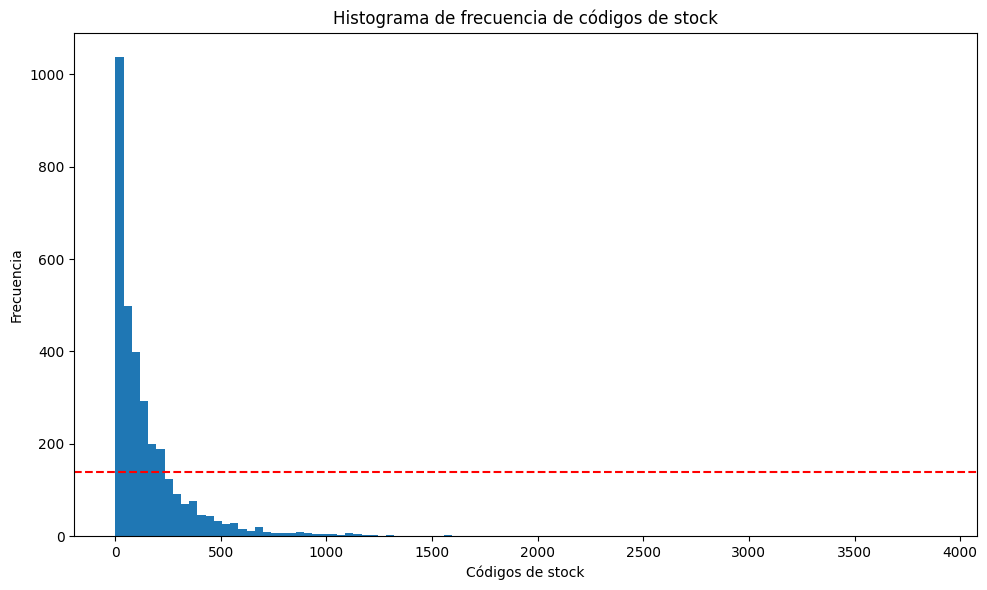

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
plt.hist(frecuencia_stockcodes, bins=100)
plt.title('Histograma de frecuencia de códigos de stock')
plt.ylabel('Frecuencia')
plt.xlabel('Códigos de stock')

plt.axhline(y=140, color='r', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
valores_bajos_frecuencia = frecuencia_stockcodes[frecuencia_stockcodes < 140].index

# Filtra el DataFrame para eliminar los valores con frecuencia menor que 140
df = df[~df['StockCode'].isin(valores_bajos_frecuencia)]
print(f'Se ha eliminado un total de {num_filas_orig - len(df)} filas en el proceso de limpieza')

Se ha eliminado un total de 125225 filas en el proceso de limpieza


#### Rango temporal de estudio



Por último, se extraerán conclusiones sobre el campo de ***InvoiceDate*** que puedan resultar útiles y contribuyan al conocimiento sobre el dominio de problema. Para ello, resulta interesante conocer la posición y prolongación en el tiempo de los datos.

In [ ]:
# Se obtienen las fechas máxima y mínima
max_t = df['InvoiceDate'].max()
min_t = df['InvoiceDate'].min()
# Cálculo del rango de fechas en días
rango = (max_t - min_t).days

print(f'Los registros se han recogido desde el {min_t.date()} hasta el {max_t.date()}')
print(f'Total de {rango} días')

Los registros se han recogido desde el 2010-12-01 hasta el 2011-12-09
Total de 373 días


De acuerdo a los resultados, los datos de estudio se componen de compras de productos en una página web de Retail que se han dado en un espacio temporal de aproximadamente un año, principalmente durante los meses del año 2012.

#### Distribución del comercio por países

Antes de proceder al empleo de las técnicas de Data Mining, se analizan los países que se encuentran en el campo ***Country*** con el fin de identificar posibles valores conflictivos o desconocidos. Asimismo, resulta de utilidad para conocer la extensión que alcanza la página de retail, así como los países en los que se localiza la mayor parte de los pedidos.

In [ ]:
frecuencia_por_pais = df['Country'].value_counts()
print(frecuencia_por_pais.describe().round(3))

count        38.000
mean      10965.368
std       61730.086
min           6.000
25%          83.000
50%         273.000
75%         954.750
max      381327.000
Name: Country, dtype: float64


In [ ]:
pais_max = frecuencia_por_pais.idxmax()
print(f'País con mayor frecuencia de compras: {frecuencia_por_pais.idxmax()}')

País con mayor frecuencia de compras: UNITED KINGDOM


Se observa que existe un amplio rango entre la frecuencia media de compra de cada país con respecto al principal foco de transacciones. Reino Unido resulta ser el mayor consumidor que recibe la página web, incrementando las posibilidades de que la empresa esté domiciliada en este país. Se procede a representar gráficamente las frecuencias del resto de países para identificar los principales clientes extranjeros y posibles valores ocultos.

DEBUG:font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=6.7.
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data

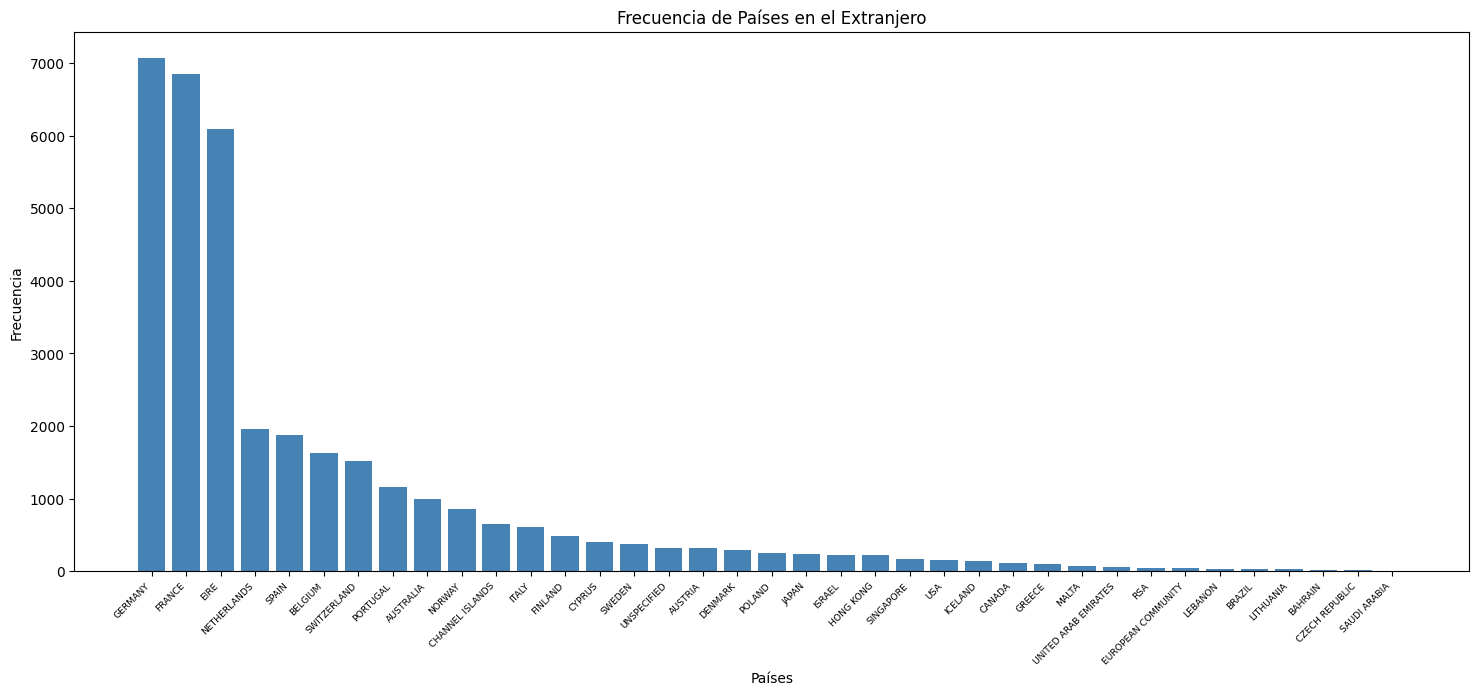

In [ ]:
# Filtrar el DataFrame excluyendo el país con la frecuencia más alta
df_sin_pais_max = df[df['Country'] != pais_max]

# Calcular la frecuencia de cada país en el DataFrame filtrado
frecuencia_por_pais = df_sin_pais_max['Country'].value_counts()

# Crear el gráfico de barras excluyendo el país con la frecuencia más alta
plt.bar(frecuencia_por_pais.index, frecuencia_por_pais.values, color='steelblue')
plt.xticks(rotation=45, ha='right', fontsize=6.7)

# Agregar etiquetas y título
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Países en el Extranjero')

# Mostrar el gráfico
plt.show()

Según los resultados observados en la gráfica, se desconoce el origen territorial de algunas de las transacciones, cuyo campo está etiquetado como UNSPECIFIED. No obstante, no resulta problemático para nuestro estudio.

### Transformación de los datos

Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en que orden compran los clientes los productos y así tomar decisiones de negocio.

El DataFrame que se ha obtenido tras la limpieza se compone por las compras de artículos únicos. Se comenzará agrupando en una misma lista aquellos artículos que cada cliente haya realizado en un mismo momento en el tiempo. Para ello, será necesario, ordenar la tabla de datos según el ID asociado a cada cliente. Asimismo, se reorganizarán en orden cronológico los registros de estos clientes.

In [ ]:
df_sorted = df.sort_values(by=['CustomerID', 'InvoiceDate'])
print(df_sorted.head())

      InvoiceNo StockCode                          Description  Quantity  \
61619    541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
14939    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941    537626     22492              MINI PAINT SET VINTAGE         36   
14942    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   

              InvoiceDate  UnitPrice  CustomerID         Country  
61619 2011-01-18 10:01:00       1.04       12346  UNITED KINGDOM  
14939 2010-12-07 14:57:00       4.25       12347         ICELAND  
14940 2010-12-07 14:57:00       3.25       12347         ICELAND  
14941 2010-12-07 14:57:00       0.65       12347         ICELAND  
14942 2010-12-07 14:57:00       1.25       12347         ICELAND  


In [ ]:
# Número de clientes que recibe la empresa
num_client = df_sorted['CustomerID'].nunique()
print(f'Número total de clientes: {num_client}')

Número total de clientes: 4299


Conocemos que hay un total de 4297 clientes presentes en la tabla de datos. Seguidamente, se procede a agrupar todos los artículos que comparten 'CustomerID' y 'InvoiceDate', es decir, se obtienen las transacciones individuales de los clientes de acuerdo a la fecha de compra.

In [ ]:
# Agrupamos los productos que se han comprado en el mismo instante de tiempo
# por cada cliente en listas
grouped_df = df_sorted.groupby(['CustomerID', 'InvoiceNo']).agg({
    'StockCode': lambda x: x.tolist(),
    'Description': lambda x: x.tolist(),
    'Quantity': lambda x: x.tolist(),
    'UnitPrice': lambda x: x.tolist(),
    'InvoiceDate': 'first',
    'Country': lambda x: x.unique().tolist()
}).reset_index()

print(grouped_df.head())

   CustomerID  InvoiceNo                                          StockCode  \
0       12346     541431                                            [23166]   
1       12347     537626  [22375, 71477, 22492, 22771, 22772, 22773, 227...   
2       12347     542237  [20719, 22375, 22725, 22726, 22727, 22728, 227...   
3       12347     549222  [22374, 22371, 22375, 20665, 23076, 21791, 225...   
4       12347     556201  [23084, 23162, 23171, 23172, 23170, 23173, 231...   

                                         Description  \
0                   [MEDIUM CERAMIC TOP STORAGE JAR]   
1  [AIRLINE BAG VINTAGE JET SET BROWN, COLOUR GLA...   
2  [WOODLAND CHARLOTTE BAG, AIRLINE BAG VINTAGE J...   
3  [AIRLINE BAG VINTAGE JET SET RED, AIRLINE BAG ...   
4  [RABBIT NIGHT LIGHT, REGENCY TEA STRAINER, REG...   

                                            Quantity  \
0                                            [74215]   
1  [4, 12, 36, 12, 12, 12, 12, 12, 12, 4, 4, 4, 4...   
2  [10, 4, 4, 4, 4, 

Bien es factible que un mismo cliente (un mismo 'CustomerID') haya efectuado compras separadas en el tiempo desde distintos países, es necesario comprobar si una misma transacción tiene asociado más de un país. En caso afirmativo, se estaría lidiando con contradicciones.

In [ ]:
# Comprobar si la longitud de las listas en cada campo es igual a 1
longitud_uno = grouped_df['Country'].apply(lambda x: len(x) == 1)

# Extraer las filas donde la longitud no es igual a 1
filas_con_longitud_distinta_a_uno = grouped_df[~longitud_uno]

# Verificar la hipótesis
if filas_con_longitud_distinta_a_uno.empty:
  print('Se confirma que todas las transacciones se han realizado desde un sólo país cada vez.')

Se confirma que todas las transacciones se han realizado desde un sólo país cada vez.


A partir de las transformaciones realizadas, se ha creado un nuevo DataFrame en el que se han agrupado las filas del original de forma que se obtengan las transacciones completas de cada cliente en cada instante del tiempo, respetando la integridad de los datos. Ahora, se reagrupará de forma que cada fila se corresponda con un solo cliente y contenga una lista de listas por cada campo. Es decir, todas las transacciones realizadas por un mismo cliente se almacenarán como una secuencia en un objeto de tipo lista.

In [ ]:
# Agrupar por CustomerID y obtener listas de listas en cada columna
customer_grouped_df = grouped_df.groupby('CustomerID').agg({
    'InvoiceNo': lambda x: x.tolist(),
    'StockCode': lambda x: x.tolist(),
    'Description': lambda x: x.tolist(),
    'Quantity': lambda x: x.tolist(),
    'UnitPrice': lambda x: x.tolist(),
    'InvoiceDate': lambda x: x.tolist(),
    'Country': lambda x: x.tolist()
}).reset_index()

# Mostrar el nuevo DataFrame
print(customer_grouped_df.head())

   CustomerID                                          InvoiceNo  \
0       12346                                           [541431]   
1       12347  [537626, 542237, 549222, 556201, 562032, 57351...   
2       12348                   [539318, 541998, 548955, 568172]   
3       12349                                           [577609]   
4       12350                                           [543037]   

                                           StockCode  \
0                                          [[23166]]   
1  [[22375, 71477, 22492, 22771, 22772, 22773, 22...   
2  [[84992, 22951, 84991, 84991, 21213, 21213, 22...   
3  [[23112, 21411, 21563, 22131, 22195, 48194, 84...   
4  [[21908, 22412, 79066, 22348, 22551, 22557, 21...   

                                         Description  \
0                 [[MEDIUM CERAMIC TOP STORAGE JAR]]   
1  [[AIRLINE BAG VINTAGE JET SET BROWN, COLOUR GL...   
2  [[72 SWEETHEART FAIRY CAKE CASES, 60 CAKE CASE...   
3  [[PARISIENNE CURIO CABINET,

Se procede a verificar que no se ha eliminado ningún cliente por error durante el proceso.

In [ ]:
# Calculamos número de filas del df
num_filas_listas = len(customer_grouped_df)

print(f'Número de filas de la lista de clientes final: {num_filas_listas}')

if num_client == num_filas_listas:
  print('La longitud del DataFrame coincide con la cantidad de clientes original')

Número de filas de la lista de clientes final: 4299
La longitud del DataFrame coincide con la cantidad de clientes original


A continuación, procedemos a eliminar de la lista de transacciones de aquellos clientes que hayan realizado una sola compra en la página web. El objetivo principal de este documento es el de estudiar posibles patrones secuenciales sobre el registro de transacciones. Sin embargo, no se pueden extraer conclusiones sobre las secuencias temporales si sólo se trata de una compra.

In [ ]:
customer_grouped_df = customer_grouped_df[customer_grouped_df['StockCode'].apply(len) > 1]

# Calculamos número de filas del df
num_filas_listas = len(customer_grouped_df)

print(f'Número de filas de la lista de clientes final: {num_filas_listas}')

Número de filas de la lista de clientes final: 2792


### GSP (Generalized Sequential Patterns)

Prueba al menos dos configuraciones de soporte diferentes.



***Se pretende estudiar el orden en el que los clientes compran productos para tomar decisiones de neogocio***

El algoritmo de ***GSP*** tiene como objetivo encontrar subsecuencias de eventos que ocurren con frecuencia dentro de un marco secuencial, es decir, existen relaciones de dependencia temporal entre eventos. La herramienta, por lo tanto, resulta de gran utilidad a la hora de comprender el comportamiento secuencial.

Dentro del contexto del presente problema, la identificación de patrones secuenciales resulta clave en las estrategias de marketing. Conocer las dependencias secuenciales o temporales entre la compra de diferentes productos puede aportar información de gran valor que garantice la configuración de ofertas y promociones de calidad que atraigan un mayor flujo de ventas a la empresa.

La definición de secuencias frecuentes viene dictada por la configuración del hiperparámetro de soporte mínimo, el umbral mínimo que un patrón debe cumplir para considerarse útil. El soporte de un patrón se define como el cociente de la frecuencia de aparición de esta con el número total de secuencias presentes. A continuación, se definirán dos posibles valores para el soporte mínimo de nuestro problema y se analizarán los resultados.

In [ ]:
# Opciones de soporte mínimo
min_support1 = 0.06
min_support2 = 0.1

# Se extraen las secuencias y se trasladan a un objeto de tipo lista
lista_secuencias = customer_grouped_df['StockCode'].tolist()

Una vez se ha definido una lista que recoge las secuencias correspondientes a cada uno de los clientes del retail, se procede a la implementación del algoritmo GSP. Con el fin de asegurar una calidad relativamente alta de las reglas generadas, se probarán dos valores diferentes para el soporte mínimo: ```0.06``` y ```0.1```.

In [ ]:
def ejecutar_GSP(lista, support):
  gsp = GSP(lista_secuencias, support)
  result = gsp.run_gsp()
  return result

# Implementación del GSP para ambas opciones de soporte
result1 = ejecutar_GSP(lista_secuencias, min_support1)
result2 = ejecutar_GSP(lista_secuencias, min_support2)

# Convertir la salida a un DataFrame de pandas
output1 = pd.DataFrame(result1, columns=["Patrón", "Soporte"])

# Mostrar el DataFrame
print('GSP con soporte mínimo de 0.06')
print(output1.to_string(index=True))

GSP con soporte mínimo de 0.06
                          Patrón  Soporte
0                      [[22492]]      184
1                      [[22726]]      290
2                      [[22727]]      352
3                      [[22728]]      261
4                      [[22729]]      170
5                      [[84997]]      290
6                      [[21731]]      232
7                      [[20719]]      209
8                      [[84992]]      287
9                      [[84991]]      362
10                     [[22417]]      235
11                     [[22423]]      734
12                     [[23076]]      170
13                     [[21791]]      291
14                     [[21975]]      253
15                     [[22699]]      360
16                     [[23084]]      406
17                     [[23171]]      175
18                     [[23170]]      203
19                     [[23173]]      227
20                     [[23174]]      169
21                     [[23175]]      191
22 

In [ ]:
# Convertir la salida a un DataFrame de pandas
output2 = pd.DataFrame(result2, columns=["Patrón", "Soporte"])

# Mostrar el DataFrame
print('GSP con soporte mínimo de 0.1')
print(output2.to_string(index=True))

GSP con soporte mínimo de 0.1
                 Patrón  Soporte
0             [[22726]]      290
1             [[22727]]      352
2             [[84997]]      290
3             [[84992]]      287
4             [[84991]]      362
5             [[22423]]      734
6             [[21791]]      291
7             [[22699]]      360
8             [[23084]]      406
9             [[22697]]      324
10            [[22621]]      316
11            [[22952]]      287
12            [[21977]]      345
13            [[21755]]      299
14            [[21754]]      328
15            [[22138]]      459
16            [[23245]]      427
17            [[22993]]      383
18            [[22624]]      312
19            [[22720]]      538
20            [[23298]]      517
21            [[22722]]      351
22            [[22178]]      349
23            [[84378]]      329
24            [[84380]]      289
25            [[21212]]      554
26            [[21080]]      375
27            [[22666]]      416
28           

Una vez se han obtenido los resultados del GSP para las dos posibilidades del hiperparámetro, se procede a elegir el más adecuado para el objeto de estudio de nuestro problema. Se observa que existe una relación inversa entre el incremento del soporte mínimo y la cantidad de patrones secuenciales generados. Bien si un soporte umbral de ```0.1``` asegura una mayor fiabilidad de las reglas con respecto a las generadas de acuerdo al umbral de valor ```0.06```, la distribución tan dispar de frecuencias entre los distintos artículos a la venta dificulta la obtención de reglas extensas que entrañen una complejidad que aporte valor a la empresa.

Se puede observar que las únicas secuencias de 2 ítems generadas para el mayor soporte umbral (```0.1```) se componen del mismo producto cuya compra ha sido repetida en el tiempo. Por lo tanto, sólo se podrían sacar conclusiones que guardan relación con artículos aislados cuya demanda puede ser reincidente.

Por otro lado, un menor soporte umbral brinda la oportunidad de analizar secuencias temporales ligeramente más complejas con las que poder establecer relaciones de dependencia entre productos de diferente naturaleza. Como consecuencia, las reglas objetos de estudio se extraerán del algoritmo GSP cuyo hiperparámetro valía ```0.06```.

### Interpretación de los resultados

Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos. (1 punto)

Como ya se ha comentado, se procederá al análisis e interpretación de las reglas proporcionadas por el algoritmo GSP cuyo soporte mínimo tiene un valor de ```0.06```. En concreto, se estudiarán las reglas asociadas con los índices 538, ... y ...

In [ ]:
# Identificar la regla con índice 538
regla_bag = output1.iloc[538]
# Ranking por frecuencia
indices_top5 = output1['Soporte'].nlargest(5).index
prod_max = output1.loc[indices_top5]

print('Regla')
print(regla_bag)
print('\nRanking de productos más frecuentes')
print(prod_max)

Regla
Patrón     [[85099], [85099], [85099]]
Soporte                            233
Name: 538, dtype: object

Ranking de productos más frecuentes
        Patrón  Soporte
11   [[22423]]      734
182  [[85123]]      697
93   [[85099]]      656
92   [[47566]]      645
194  [[84879]]      560


Comprobamos que el tercer producto con mayor frecuencia de aparición aparece en una de las reglas de longitud 3. No obstante, esta regla indica la repetición de la compra de un mismo producto hasta tres veces en diferentes instantes de tiempo. Esto quiere decir que los clientes acostumbran a comprar este tipo de artículo con bastante frecuencia a lo largo del rango de transacciones.

In [ ]:
print(df[df['StockCode'] == '85099']['Description'].unique())

['JUMBO  BAG BAROQUE BLACK WHITE' 'JUMBO BAG RED RETROSPOT'
 'JUMBO BAG STRAWBERRY']


In [ ]:
# Precio del artículo
print(df[df['StockCode'] == '85099']['UnitPrice'].unique()[0])

1.95


Se observa que el producto en cuestión se corresponde con lo que se denomina como JUMBO BAG, es decir, la compra de bolsas muy grandes utilizadas para trasnportar o almacenar grandes cantidades de útiles. Debido a la gran utilidad que tienen así como su bajo precio, tiene sentido que se de con tanta frecuencia su compra, incluso por los mismos clientes. No obstante, la relevancia a nivel de estrategias comerciales es muy pobre, ya que no suponen ganancias cuantiosas y no se pueden establecer relaciones causales con otros productos.

**Regla 1**

A continuación, se procede a examinar patrones secuenciales cuyo contenido presenta relaciones de mayor complejidad entre productos. En primer lugar, se analizará la asociada al índice 536.

In [ ]:
# Identificar la regla con índice 536
regla_1 = output1.iloc[536]
# Se extraen las descripciones a partir de los códigos de stock
codes = regla_1['Patrón'][0]
productos = df[df['StockCode'].isin(codes)]['Description'].unique()

print('Regla 1')
print(regla_1)
print(f'Productos:\n {productos}')

Regla 1
Patrón     [[22423, 22697, 22699]]
Soporte                        173
Name: 536, dtype: object
Productos:
 ['REGENCY CAKESTAND 3 TIER' 'ROSES REGENCY TEACUP AND SAUCER '
 'GREEN REGENCY TEACUP AND SAUCER']


In [ ]:
# Cálculo del precio total de la regla
precios_te = []

for code in codes:
  precios_te.append(df[df['StockCode']==code]['UnitPrice'].unique()[0])

print(f'Precio total: {sum(precios_te).round(2)} libras')

Precio total: 16.85 libras


Se observa que la regla indica que, con frecuencia, se da la conjunción de los siguientes tres productos en una misma transacción.

* **REGENCY CAKESTAND 3 TIER**: Soporte para tartas de tres niveles, con motivos de época.
* **ROSES REGENCY TEACUP AND SAUCER**: Juego de té, con motivos florales y de época.
* **GREEN REGENCY TEACUP AND SAUCER**: Juego de té, de color verde con motivos de época.

La obtención de estos resutados se puede justificar en la importancia de la tradición británica de la hora del té, pues ya se había observado que el país de mayor flujo de ventas es Reino Unido. A pesar de la importante variedad de productos que muestra el presente dataset, destaca el interés de los clientes por este tipo de vajillas. Conociendo que la empresa de estudio es británica pero destaca por un amplio mercado en el extranjero, esta regla podría ser símbolo de la preferencia que los clientes extranjeros muestran por la compra de este tipo de productos a empresas inglesas.

**Regla 2**

A continuación, se procede a examinar patrones secuenciales cuyo contenido presenta relaciones de mayor complejidad entre productos. En primer lugar, se analizará la asociada al índice 536.

In [ ]:
regla_2 = output1.iloc[487]

# Se extraen las descripciones a partir de los códigos de stock
codes2 = regla_2['Patrón'][0]
productos2 = df[df['StockCode'].isin(codes2)]['Description'].unique()

print('Regla 2')
print(regla_2)
print(f'Productos:\n {productos2}')

Regla 2
Patrón     [[85123], [22470]]
Soporte                   169
Name: 487, dtype: object
Productos:
 ['WHITE HANGING HEART T-LIGHT HOLDER' '?'
 'CREAM HANGING HEART T-LIGHT HOLDER']


Se observa que la regla indica que los clientes que compraron primero WHITE HANGING HEART T-LIGHT HOLDER, con frecuencia acabarán comprando CREAM HANGING HEART T-LIGHT HOLDER

La adquisición de estos objetos, ambos pertenecientes al mismo estilo de decoración, puede explicarse por el hecho de que la compra de uno de ellos conduce probablemente a la adquisición de otros objetos similares para continuar con el proceso de decoración.


### Conclusiones

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan (1 punto)

El primer paso fundamental para garantizar la obtención de información de calidad es contar con una base de datos sólida. Esto implica tener una base de datos bien estructurada y organizada, donde los atributos o características de los datos se comprendan claramente y estén estandarizados en términos de formato y contenido.

Una base de datos bien diseñada y homogenizada es esencial para facilitar la interpretación y el análisis de los datos. Esto significa que los nombres de los campos, etiquetas y categorías deben ser coherentes y comprensibles para todos los usuarios que accedan a la base de datos. Además, los datos deben estar homogeneizados en términos de formato y unidad de medida, lo que facilita su comparación y combinación para obtener información significativa.

Al tener una base de datos de calidad, los usuarios pueden confiar en la precisión y fiabilidad de la información que contiene. Esto es fundamental para la toma de decisiones informadas y la realización de análisis efectivos en diversos ámbitos, como el empresarial, científico o académico. Por lo tanto, invertir tiempo y recursos en el desarrollo y mantenimiento de una base de datos sólida es crucial para asegurar la calidad y utilidad de la información que se obtiene de ella.

El primer punto en el que debería invertir el negocio es este, para evitar confusiones y problemas similares a los que se han presentado a lo largo de la práctica, sería beneficioso establecer un criterio uniforme para la creación de los StockCodes. Si optamos por utilizar letras para denotar características específicas de los productos, debemos asegurarnos de aplicar este enfoque de manera coherente en todos los casos. Por ejemplo, si la letra "B" representa un color específico en un producto, deberíamos garantizar que esta convención se mantenga consistente en todos los productos donde se aplique. Esto proporcionaría una estructura clara y coherente que facilitaría la interpretación de los códigos.

Por otro lado, si decidimos utilizar números consecutivos para los StockCodes, es fundamental garantizar que exista una separación clara entre los diferentes tipos de productos. Esto podría lograrse incorporando al menos un espacio entre los números consecutivos asignados a diferentes categorías de productos. De esta manera, se evitaría la confusión entre productos diferentes y se facilitaría la identificación y organización de los productos en el sistema.

Además, es importante evitar dejar espacios entre los productos que sean idénticos pero que tengan características diferentes. Por ejemplo, si un producto está representado por el código "123A" y otro producto idéntico, pero con un color diferente tiene el código "123B", deberíamos asegurarnos de que no haya otros productos intercalados entre "123A" y "123B". Esto ayudaría a mantener la coherencia y la claridad en la codificación de los productos, facilitando así su gestión y análisis en el sistema.

**Estrategias comerciales**

Por otro lado, resulta de especial importancia destacar las reglas útiles que se han estudiado previamente sobre los productos del Retail gracias a la aplicación de las técnicas de Data Mining asociadas a la identificación de patrones secuenciales. Los resultados de esta herramienta permiten un conocimiento más preciso sobre el comportamiento de los clientes, sus intereses y la consecución de la compra de distintos artículos a lo largo del tiempo. De esta forma, la empresa puede utilizar este conocimiento para trazar y modificar las estrategias comerciales y de marketing con el fin de maximizar el beneficio económico y atraer un mayor número de clientes.

La regla 1 que se ha analizado anteriormente incluía la relación entre distintos productos asociados con la tradición de la merienda y el té en Reino Unido. En concreto, se centraba en la frecuencia relativamente alta con la que se daba la compra simultánea de productos como juegos de té o soportes de tarta por un mismo cliente. El rasgo más importante de esta regla se encuentra en la **confluencia** de estos productos en una misma transacción. Es decir, las estrategias de marketing asociadas a este patrón tendrán como foco de atención la promoción de ventas en forma de ***Bundle***. Para ello, se generarían opciones que permitan la compra agrupada de un set de té así como un soporte de tarta con el objetivo de aumentar las ventas y proporcionar un valor agregado. Estos *Bundles* permitirían la venta de estos productos juntos sobre la que se aplicaría algún tipo de descuento.

In [ ]:
print(f'Precio original\nSoporte de tarta + juego de té = {sum(precios_te[:2]).round(2)}')

Precio original
Soporte de tarta + juego de té = 13.9


De acuerdo al precio actual de los productos individuales (13.90 libras), las técnicas comerciales estarían orientadas a ofertar la venta del *Bundle* por un valor menor, de aproximadamente 11 libras. Esta estrategia de marketing consigue un mayor beneficio económico a largo plazo para la empresa, pues aportan valor al ofrecer a sus clientes una solución completa a sus necesidades; en este caso, solucionan la compra de los artículos necesarios para la tradición inglesa de la hora del té.

Por otro lado, existen diversas estrategias comerciales que pueden derivarse de la aplicación de la regla 2.
La primera estrategia, estrechamente vinculada al hecho de que las compras se realicen de manera secuencial en lugar de simultánea, consiste en agrupar los elementos adquiridos junto con otros similares dentro de una misma colección. Con la compra de uno de estos artículos, se puede ofrecer un descuento para la adquisición en compras posteriores de otro objeto perteneciente a esa misma colección.

Otra estrategia viable sería la introducción de más productos que sigan el mismo estilo, pero variando la forma del objeto. Por ejemplo, en lugar de ofrecer un producto con forma de corazón, se podría presentar una versión con forma de estrella. Además, sería beneficioso adaptar la colección a las distintas estaciones del año y observar el impacto que esto tiene en la percepción de los clientes y en sus patrones de compra.